<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/Optiver_comp_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.0 Dataset Description**
This dataset contains historic data for the daily ten minute closing auction on the NASDAQ stock exchange. Your challenge is to predict the future price movements of stocks relative to the price future price movement of a synthetic index composed of NASDAQ-listed stocks.

This is a forecasting competition using the time series API. The private leaderboard will be determined using real market data gathered after the submission period closes.

#### **Files**
* **[train/test].csv** The auction data. The test data will be delivered by the API.

* **stock_id** - A unique identifier for the stock. Not all stock IDs exist in every time bucket.
* **date_id** - A unique identifier for the date. Date IDs are sequential & consistent across all stocks.
* **imbalance_size** - The amount unmatched at the current reference price (in USD).
* **imbalance_buy_sell_flag** - An indicator reflecting the direction of auction imbalance:
  * buy-side imbalance; 1
  * sell-side imbalance; -1
  * no imbalance; 0
* **reference_price** - The price at which paired shares are maximized, the imbalance is minimized and the distance from the bid-ask midpoint is minimized, in that order. Can also be thought of as being equal to the near price bounded between the best bid and ask price.
* **matched_size** - The amount that can be matched at the current reference price (in USD).
* **far_price** - The crossing price that will maximize the number of shares matched based on auction interest only. This calculation excludes continuous market orders.
* **near_price** - The crossing price that will maximize the number of shares matched based auction and continuous market orders.
* **[bid/ask]_price** - Price of the most competitive buy/sell level in the non-auction book.
* **[bid/ask]_size** - The dollar notional amount on the most competitive buy/sell level in the non-auction book.
* **wap** - The weighted average price in the non-auction book.

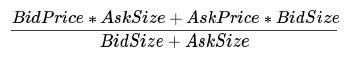

* **seconds_in_bucket** - The number of seconds elapsed since the beginning of the day's closing auction, always starting from 0.
* **target** - The 60 second future move in the wap of the stock, less the 60 second future move of the synthetic index. Only provided for the train set.
 * The synthetic index is a custom weighted index of Nasdaq-listed stocks constructed by Optiver for this competition.
 * The unit of the target is basis points, which is a common unit of measurement in financial markets. A 1 basis point price move is equivalent to a 0.01% price move.
 * Where t is the time at the current observation, we can define the target:

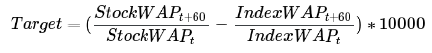

All size related columns are in USD terms.

**All price related columns are converted to a price move relative to the stock wap (weighted average price) at the beginning of the auction period.**

* **sample_submission**: A valid sample submission, delivered by the API. See this [notebook](https://www.kaggle.com/code/sohier/optiver-2023-basic-submission-demo) for a very simple example of how to use the sample submission.

* **revealed_targets** The first time_id for each date in this file provides the true target values for the entire previous date. All other rows contain mostly null values.

* **public_timeseries_testing_util.py**: An optional file intended to make it easier to run custom offline API tests. See the script's docstring for details.

* **example_test_files** Data intended to illustrate how the API functions. Includes the same files and columns delivered by the API.

* **optiver2023** Files that enable the API. Expect the API to deliver all rows in under five minutes and to reserve less than 0.5 GB of memory.

#### **Relevant Files**

* [Starter Pack v1](https://www.kaggle.com/code/mmmarchetti/the-most-simple-and-dumbest-starter-s-notebook)
* [Discussion](https://www.kaggle.com/competitions/optiver-trading-at-the-close/discussion)
* [Starter Pack v1](https://www.kaggle.com/code/iqbalsyahakbar/optiver-a-starter-s-notebook/notebook)  
* [Discord Chat](https://discord.com/channels/1101210829807956100/onboarding)

### 1.1 Install Packages:

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
!pip install MiniSom

### **1.2 Packages**

In [2]:
#from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
#from pytorch_forecasting.data import GroupNormalizer
#from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
#from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

#import pytorch_lightning as pl
#from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
#from pytorch_lightning.loggers import TensorBoardLogger
#import torch

In [3]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 8.56077790260315 sec


<Figure size 640x480 with 0 Axes>

In [4]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.14.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.0
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.1


In [5]:
df = pd.DataFrame({'B': [1, 1, 1, 3, 4, 4, 5, 7],'A': [1, 1, 2, 4, 4, 4, 5, 7]})

df_roll = df.rolling(3,min_periods=1).mean()

df.div(df_roll).subtract(1)

B         A
0  0.000000  0.000000
1  0.000000  0.000000
2  0.000000  0.500000
3  0.800000  0.714286
4  0.500000  0.200000
5  0.090909  0.000000
6  0.153846  0.153846
7  0.312500  0.312500

### **1.3 Utility Functions**

In [6]:
def plot_data(a_,b_,df_):
  fig, axs = plt.subplots(1,3,figsize=(14,4))
  df=df_.copy()
  a=a_
  b=b_
  axs[0].plot(df[a])
  axs[0].set_title(a,fontsize=10)
  axs[1].plot(df[b])
  axs[1].set_title(b,fontsize=10)
  axs[2].scatter(df["target"],(df[a].div(df[b]))**2)
  axs[2].set_title("Scatter {} vs {}".format(a,b),fontsize=10);
  plt.show()

def find_parameters(df):

  X_ = df[(df["far_price"]>=0.5)|(df["far_price"]<=1.5)]["near_price"].values.reshape(-1,1)
  y_ = df[(df["far_price"]>=0.5)|(df["far_price"]<=1.5)]["far_price"].values.reshape(-1,1)
  print(X_.shape,y_.shape)
  lr = LinearRegression()

  lr.fit(X=X_,y=y_)
  print("Coeff: {}\nIntercept: {}".format(lr.coef_[0][0], lr.intercept_[0]))

  return lr.intercept_[0], lr.coef_[0][0]

def replace_farprice(df_, intercept, beta):
  df  = df_.copy()
  arr_0 = df[(df["far_price"]>1.5)|(df["far_price"]<0.5)]["far_price"].values
  arr_1 = df[(df["far_price"]>1.5)|(df["far_price"]<0.5)]["near_price"].values

  arr_1 = intercept + beta*arr_1

  df["far_price"].replace(arr_0, arr_1, inplace=True)

  arr_2_ind = df[(df["far_price"].isna()==True)&(df["near_price"].isna()==False)].index

  arr_2 = intercept + beta*df.loc[arr_2_ind,"near_price"]

  df.loc[arr_2_ind,"far_price"] = arr_2

  df["check_near_far"] = df["near_price"].div(df["far_price"])

  return df

def train_col_def(df):

  train_col = list(df.columns)
  aggregator = ["stock_id","time_id","date_id"]
  for ag in aggregator:
    train_col.remove(ag)

  return train_col

def fill_nan_df(df):

  df_ = df.copy()
  print("Dataset Original Shape: {}".format(df_.shape))
  # Replace extreme Values in near and far prices:
  #alpha, beta = find_parameters(df_)
  beta= 2.2491285714921436
  alpha= -1.2465923656098574

  df_ = replace_farprice(df_, intercept=alpha, beta=beta)

#  values = {"far_price": df_.loc[:,"far_price"].median(), "near_price": df_.loc[:,"near_price"].median()}
#  df_.fillna(value=values,inplace=True)

  # Replace NaN for Far+price and Near_Price with reference Price values
  df_['far_price'] = df_['far_price'].fillna(df_['reference_price'])
  df_['near_price'] = df_['near_price'].fillna(df_['reference_price'])

  df_['far_price'] = df_['far_price'].interpolate(limit=1, limit_direction="forward")
  df_['near_price'] = df_['near_price'].interpolate(limit=1, limit_direction="forward")

  df_["check_near_far"] = df_["near_price"].div(df_["far_price"])


  list_cols_fill = ["imbalance_size","imbalance_buy_sell_flag","wap","reference_price","matched_size","bid_price","ask_price","check_near_far"]

  for data in list_cols_fill:
      train_col = train_col_def(df_)
      df_reshaped = df_.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")
      df_reshaped.loc[:,data].fillna(method="ffill",axis=0,inplace=True)
      df_ = df_reshaped.stack(level=1).reset_index().dropna(axis=0, thresh=10)

  # Add features for company size based on volumes:
  df_ = comp_size(df_)

  ##### add features transformer here #####
  feature_list = ["ask_size","bid_size","imbalance_size","matched_size"]
  transformer = FunctionTransformer(lambda x: np.log(x + 1))
  df_[feature_list] = transformer.transform(df_[feature_list])

  # Create additional Features: "imbalance_size_sign"
  df_["imbalance_size_sign"] = df_["imbalance_size"].multiply(df_["imbalance_buy_sell_flag"])
  # Create additional Features:
  df_["imbalance_size_sign_delta"] = 0
  train_col = train_col_def(df_)
  df_reshaped = df_.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")
  df_reshaped["imbalance_size_sign_delta"] = df_reshaped["imbalance_size_sign"].diff()
  df_reshaped["imbalance_size_sign_delta"].fillna(method="ffill",inplace=True)
  df_reshaped["imbalance_size_sign_delta"][df_reshaped[("seconds_in_bucket",0)]==0] = 0
  #Reshape in the Original Format:
  new_df_ = df_reshaped.stack(level=1).reset_index().dropna(axis=0, thresh=10)
  new_df_.reset_index(inplace=True, drop=True)
  print("Dataset Final Shape: {}".format(new_df_.shape))

  return new_df_

def get_rsi(close, lookback):
    ret = close.diff()

    up = ret.apply(lambda x: x if x > 0 else 0)
    down = ret.apply(lambda x: -x if x < 0 else 0)

    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    #rsi_df = rsi_df.dropna()
    return rsi_df#[3:]

### CREATE NEW FEATURES ###
def create_new_features(df):
  df_=df.copy()
  train_col = train_col_def(df_)
  try:
    train_col.remove("dispersion")
  except:
    pass
  df_resh_ = df_.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")
  # Add return dispersion
  df_resh_["dispersion"] = df_resh_["wap"].std(axis=1)
  daily_dispersion=df_resh_.groupby(["time_id"])["dispersion"].agg("mean")
  df_resh_.drop("dispersion",axis=1,inplace=True)
  # Add Equally Weighted Index
  df_resh_["eq_wgt_index"] = df_resh_["wap"].mean(axis=1)
  daily_eq_wgt=df_resh_.groupby(["time_id"])["eq_wgt_index"].agg("mean")
  df_resh_.drop("eq_wgt_index",axis=1,inplace=True)

  # Reshape and add new features
  new_df = df_resh_.stack(level=1).reset_index(drop=False).dropna(axis=0, thresh=10)
  new_df = pd.merge(left=new_df, right=daily_dispersion, left_on="time_id", right_on="time_id")
  new_df = pd.merge(left=new_df, right=daily_eq_wgt, left_on="time_id", right_on="time_id")

  # Add bid-ask spread
  new_df["bid_ask_spread"] = new_df["ask_price"]-new_df["bid_price"]

  # Add bid-ask_size_spread
  new_df["bid_ask_size_spread"] = new_df["ask_size"]-new_df["bid_size"]

  train_col = train_col_def(new_df)
  df_resh_ = new_df.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")

  #df_resh_["dispersion"] = df_resh_["dispersion"].shift(55)
  df_resh_["dispersion"].fillna(df_resh_["dispersion"].median(),inplace=True)

  #reshape to original shape
  new_df = df_resh_.stack(level=1).reset_index(drop=False).dropna(axis=0, thresh=10)

  return df_resh_ , new_df

%time
def add_level_prices(df_resh_exp,df_exp):

    test_ts = df_resh_exp.copy()
    to_merge = test_ts.loc[:,["wap"]]
    to_merge_price = test_ts.loc[:,["wap"]]

    #display(to_merge_price.head(3))

    to_merge.rename({"wap":"rsi"},axis=1,inplace=True)
    to_merge_price.rename({"wap":"cum_price"},axis=1,inplace=True)

    #display(to_merge_price.head(3))

    to_merge.fillna(0,inplace=True)
    to_merge_price.fillna(1,inplace=True)

    #display(to_merge_price.head(3))

    to_merge_price = to_merge_price.cumprod()

    # Moving Average Features:
    to_merge_ma = to_merge_price.rolling(20,min_periods=1).mean()
    to_merge_ma = to_merge_price.div(to_merge_ma).subtract(1)
    to_merge_ma.fillna(0, inplace=True)
    to_merge_ma.rename({"cum_price":"mov_average_st"},axis=1,inplace=True)

    to_merge_ma_lt = to_merge_price.rolling(60,min_periods=1).mean()
    to_merge_ma_lt = to_merge_price.div(to_merge_ma_lt).subtract(1)
    to_merge_ma_lt.fillna(0, inplace=True)
    to_merge_ma_lt.rename({"cum_price":"mov_average_lt"},axis=1,inplace=True)

    #display(to_merge_price.head(3))

    for i_ in tqdm(range(200)):
      rsi = get_rsi(to_merge_price.loc[:,("cum_price",i_)], 14)
      to_merge.loc[:,("rsi",i_)] = rsi
      gc.collect()

    to_merge.fillna(method="ffill",inplace=True)
    to_merge.fillna(method="bfill",inplace=True)

    mask = test_ts.loc[:,["wap"]].isna()==False
    mask.astype("float").replace({0:np.nan},inplace=True)
    to_merge = to_merge*mask.values

    # Add new series to old df:
    test_ts = pd.merge(left=test_ts, right=to_merge, left_on="time_id", right_on="time_id")
    test_ts = pd.merge(left=test_ts, right=to_merge_price, left_on="time_id", right_on="time_id")
    test_ts = pd.merge(left=test_ts, right=to_merge_ma, left_on="time_id", right_on="time_id")
    test_ts = pd.merge(left=test_ts, right=to_merge_ma_lt, left_on="time_id", right_on="time_id")
    gc.collect()

    #reshape to original shape
    test_ts = test_ts.stack(level=1).reset_index(drop=False).dropna(axis=0, thresh=10)
    #new_long_df = pd.merge(left=new_long_df,right=df_exp[["date_id","time_id"]],left_on="time_id", right_on="time_id")
    test_ts["date_id"] = df_exp["date_id"]
    gc.collect()

    return test_ts

##### New Functions ####

def add_volume_cluster(df_input):
  current_directory = os.getcwd()

  os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

  with open('replace_cluster_dict.pickle', 'rb') as handle:
      replace_cluster_dict = pickle.load(handle)

  with open('replace_correlationcluster_dict.pickle', 'rb') as handle:
      replace_correlationcluster_dict = pickle.load(handle)

  os.chdir(current_directory)


  df = df_input.copy()

  df["vol_cluster"] = df["stock_id"]
  df["vol_cluster"].replace(replace_cluster_dict, inplace=True)

  df["corr_cluster"] = df["stock_id"]
  df["corr_cluster"].replace(replace_correlationcluster_dict, inplace=True)

  return df

def add_relative_perf(df_input):
  df = df_input.copy()

  df["rel_perf"] = (df["wap"]).div(df["eq_wgt_index"])

  return df

def comp_size(train):

  volumes_df = train.groupby(["stock_id","date_id"])[["matched_size"]].agg("sum").unstack(["stock_id"])
  mean_vols = volumes_df.mean(axis=0)

  df=mean_vols.copy()
  size={}

  for i_ in tqdm(df["matched_size"].index):
    if df["matched_size"][i_]>=1_000_000_000:
      size[i_] = 2
    elif df["matched_size"][i_]<1_000_000_000 and df["matched_size"][i_]>500_000_000:
      size[i_] = 1
    else:
      size[i_] = 0

  train["vol_bucket"]=train["stock_id"].replace(size)

  return train

def imbalance_features(df_):

  df=df_.copy()

  # Volume Imbalaces:
  df["imbalance_buy_sell_flag"] = df["imbalance_buy_sell_flag"].replace({-1:0,0:1,1:2})
  df['imbalance1'] = (df['bid_size'] - df['ask_size']) / (df['bid_size'] + df['ask_size'])
  df['imbalance2'] = (df['imbalance_size'] - df['matched_size']) / (df['matched_size'] + df['imbalance_size'])+1
  df['imbalance_ratio'] = df['imbalance_size'] / df['matched_size']
  # Vol_prices imbalances:
  df["volume"] = df['bid_size'] + df['ask_size']
  df["ask_priceXsize"] = df["ask_price"] * df["ask_size"]
  df["bid_priceXsize"] = df["bid_price"] * df["bid_size"]
  df["bidask_priceXsize"] = df["bid_priceXsize"].div(df["ask_priceXsize"])
  # Prices imbalances:
  prices = ['reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']

  df.drop(labels="bid_ask_spread", inplace=True, axis=1)

  for i, price_a in enumerate(prices):
      for j, price_b in enumerate(prices):
          if i > j:
              df[f'{price_a}-{price_b}'] = (df[price_a] - df[price_b]).astype(np.float32)
              df[f'{price_a}*{price_b}'] = (df[price_a] * df[price_b]).astype(np.float32)
              imbalance_column_name = f'imbalance_{price_a}_{price_b}'
              df[imbalance_column_name] = (df[price_a] - df[price_b]) / (df[price_a] + df[price_b])

  df.drop(labels=["wap-ask_price","wap-reference_price","imbalance_wap_bid_price","ask_price*reference_price",
                  "bid_price*reference_price","bid_price*ask_price","wap*reference_price","wap*ask_price",
                  "wap*bid_price","bid_price-reference_price","imbalance_ask_price_reference_price","bid_priceXsize",
                  "far_price*reference_price","ask_price*far_price","bid_price*far_price","wap*far_price","imbalance_near_price_reference_price",
                  "wap-near_price","near_price-reference_price","imbalance_bid_price_near_price","imbalance_ask_price_near_price","bid_price-near_price","ask_price-near_price",
                  "bid_price*near_price","ask_price*near_price","near_price*reference_price","ask_price-far_price","bid_price-far_price","imbalance_ask_price_far_price",
                  "wap-far_price","imbalance_bid_price_far_price","far_price-reference_price","imbalance_far_price_reference_price","near_price*far_price","imbalance_wap_far_price",
                  "imbalance_size","bid_price-ask_price"],
          inplace=True,
          axis=1)

  ##### transformadditional features #####

  #["dispersion","bidask_priceXsize","wap-bid_price","imbalance_wap_ask_price","imbalance_bid_price_ask_price"]

  df["dispersion"] = np.log(df["dispersion"]*1000+1.0)
  df["bidask_priceXsize"] = np.log(df["bidask_priceXsize"])

  transformer = FunctionTransformer(lambda x: np.power( x, 0.25))
  df["wap-bid_price"] = transformer.transform(df["wap-bid_price"])

  transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(0.000001-x)))
  df["imbalance_wap_ask_price"] = transformer.transform(df["imbalance_wap_ask_price"])

  transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
  df["imbalance_bid_price_ask_price"] = transformer.transform(df["imbalance_bid_price_ask_price"])

  # Add squared values for ask_size and bid_size
  #volume_feature = ['ask_size','bid_size']
  #df_volume_ = df[volume_feature].copy()

  #current_directory = os.getcwd()

  #os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

  #with open('bid_ask_scaler.pickle', 'rb') as handle:
  #    scaler = pickle.load(handle)

  #os.chdir(current_directory)


  #df_volume = scaler.transform(df_volume_)
  #df_volume = pd.DataFrame(data=df_volume, columns=['ask_size_sq','bid_size_sq'])

  #df_volume = df_volume**2
  #df_volume = np.log(df_volume)

  #df = pd.concat([df,df_volume], axis=1)

  return df

def agg_features_creation(df):
  train_ext = add_volume_cluster(df)
  #train_ext = comp_size(train_ext)
  train_ext = imbalance_features(train_ext)
  return train_ext

def add_price_lags(df_,n_lags=20):
  df = df_.copy()
  cols=["date_id","time_id","stock_id"]
  cols_rsi=["date_id","time_id","stock_id"]
  cum_price_for_lags = df.groupby(["date_id","time_id","stock_id"])[["cum_price"]].first().unstack("stock_id")
  rsi_for_lags = df.groupby(["date_id","time_id","stock_id"])[["rsi"]].first().unstack("stock_id")
  all_temp = []
  all_temp_rsi = []

  gc.collect()

  for i in tqdm(range(1,n_lags)):

    temp = pd.DataFrame(index=cum_price_for_lags.index,columns=cum_price_for_lags.columns,data=cum_price_for_lags.shift(i).fillna(method="bfill",limit=i).values).rename({"cum_price":"cum_price_dlag{}".format(i)},axis=1)
    all_temp.append(temp)
    cols.append("cum_price_dlag{}".format(i))

    temp_rsi = pd.DataFrame(index=cum_price_for_lags.index,columns=rsi_for_lags.columns,data=rsi_for_lags.shift(i).fillna(method="bfill",limit=i).values).rename({"rsi":"rsi_dlag{}".format(i)},axis=1)
    all_temp_rsi.append(temp_rsi)
    cols_rsi.append("rsi_dlag{}".format(i))
    gc.collect()

  flag_merged = pd.concat(all_temp, axis=1)
  flag_merged = flag_merged.stack(level=1).reset_index().dropna(axis=0, thresh=10)
  flag_merged = flag_merged.loc[:,cols]
  flag_merged = pd.merge(left=df, right=flag_merged, how="left", left_on=["date_id",	"time_id",	"stock_id"], right_on=["date_id",	"time_id",	"stock_id"], )

  rsi_merged = pd.concat(all_temp_rsi, axis=1)
  rsi_merged = rsi_merged.stack(level=1).reset_index().dropna(axis=0, thresh=10)
  rsi_merged = rsi_merged.loc[:,cols_rsi]
  rsi_merged = pd.merge(left=flag_merged, right=rsi_merged, how="left", left_on=["date_id",	"time_id",	"stock_id"], right_on=["date_id",	"time_id",	"stock_id"], )

  rsi_merged.rename({"cum_price":"cum_price_dlag0","rsi":"rsi_dlag0"}, axis=1,inplace=True)

  current_directory = os.getcwd()

  os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
  estimator_v0 = joblib.load("tree_feature_model_v0.joblib")
  estimator_v1 = joblib.load("tree_feature_model_v1.joblib")
  os.chdir(current_directory)

  tree_features_v0 = ['imbalance_wap_reference_price', 'imbalance_size_sign_delta', 'rsi_dlag0','bid_ask_size_spread']
  tree_features_v1 = ['imbalance_size_sign', 'matched_size', 'ask_size','bid_size','bid_ask_size_spread']

  rsi_merged["tree_feat_v0"] = estimator_v0.predict(rsi_merged[tree_features_v0])
  rsi_merged["tree_feat_v1"] = estimator_v1.predict(rsi_merged[tree_features_v1])

  return rsi_merged







########################### AGGREGATE ################################
def all_features_creation(df_):
  df=df_.copy()

  df = fill_nan_df(df)
  gc.collect()
  print("Step I: {}".format(df.shape))
  df_resh_exp, df = create_new_features(df)
  gc.collect()
  print("Step II: {}".format(df.shape))
  df = add_level_prices(df_resh_exp,df)
  gc.collect()
  print("Step III: {}".format(df.shape))
  df = agg_features_creation(df)
  gc.collect()
  print("Step IV: {}".format(df.shape))
  df = add_price_lags(df,n_lags=20)
  gc.collect()
  print("Step V: {}".format(df.shape))

  return df

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 17.9 µs


### **2.1 Connect Drives**

Verify System:

In [36]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/bin/bash: line 1: nvidia-smi: command not found


In [37]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

SEED = 42
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

seed_everything(SEED)

Connect to Google Drive:

In [38]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
folder_data = "/content/drive/MyDrive/kaggle/Optiver_comp_2023/Data/"
models_folders = "/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models"
folders_nn = "/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/neural_networks/"

list_directories = [folder_data,models_folders,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/kaggle/Optiver_comp_2023/Data/ already exists
/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models already exists
/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/neural_networks/ already exists


## 2.0 Create Datasets

This Files contains the Functions to create the final version of the dataset starting from the original data provided.

In [11]:
train = pd.read_csv(r'train.csv').drop('row_id', axis = 1)
train = train.dropna(axis=0, subset=["target"])
revealed_targets = pd.read_csv("example_test_files/revealed_targets.csv")
test = pd.read_csv("example_test_files/test.csv")

In [12]:
revealed_targets[revealed_targets.revealed_date_id==478].revealed_target

11054    -5.429983
11055    -1.869798
11056    -0.090003
11057    -7.609725
11058    -3.290176
           ...    
22049   -10.110140
22050     0.280142
22051    -4.090071
22052     6.519556
22053    11.420250
Name: revealed_target, Length: 11000, dtype: float64

In [13]:
test

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0             0      478                  0      3753451.43   
1             1      478                  0       985977.11   
2             2      478                  0       599128.74   
3             3      478                  0      2872317.54   
4             4      478                  0       740059.14   
...         ...      ...                ...             ...   
32995       195      480                540      2440722.89   
32996       196      480                540       349510.47   
32997       197      480                540            0.00   
32998       198      480                540      1000898.84   
32999       199      480                540      1884285.71   

       imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                           -1         0.999875   11548975.43        NaN   
1                           -1         1.000245    3850033.97        NaN   
2                            1         1.000584    4359198.25        NaN   
3                           -1         0.999802   27129551.64        NaN   
4                           -1         0.999886    8880890.78        NaN   
...                        ...              ...           ...        ...   
32995                       -1         1.000317   28280361.74   0.999734   
32996                       -1         1.000643    9187699.11   1.000129   
32997                        0         0.995789   12725436.10   0.995789   
32998                        1         0.999210   94773271.05   0.999210   
32999                       -1         1.002129   24073677.32   1.000859   

       near_price  bid_price   bid_size  ask_price   ask_size       wap  \
0             NaN   0.999875   22940.00   1.000050    9177.60  1.000000   
1             NaN   0.999940    1967.90   1.000601   19692.00  1.000000   
2             NaN   0.999918    4488.22   1.000636   34955.12  1.000000   
3             NaN   0.999705   16082.04   1.000189   10314.00  1.000000   
4             NaN   0.999720   19012.35   1.000107    7245.60  1.000000   
...           ...        ...        ...        ...        ...       ...   
32995    0.999734   1.000317   32257.04   1.000434  319862.40  1.000328   
32996    1.000386   1.000643  205108.40   1.000900   93393.07  1.000819   
32997    0.995789   0.995789   16790.66   0.995883  180038.32  0.995797   
32998    0.999210   0.998970  125631.72   0.999210  669893.00  0.999008   
32999    1.001494   1.002129  250081.44   1.002447  300167.56  1.002274   

       time_id       row_id  
0        26290      478_0_0  
1        26290      478_0_1  
2        26290      478_0_2  
3        26290      478_0_3  
4        26290      478_0_4  
...        ...          ...  
32995    26454  480_540_195  
32996    26454  480_540_196  
32997    26454  480_540_197  
32998    26454  480_540_198  
32999    26454  480_540_199  

[33000 rows x 16 columns]

In [14]:
train.tail()

stock_id  date_id  seconds_in_bucket  imbalance_size  \
5237975       195      480                540      2440722.89   
5237976       196      480                540       349510.47   
5237977       197      480                540            0.00   
5237978       198      480                540      1000898.84   
5237979       199      480                540      1884285.71   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
5237975                       -1         1.000317   28280361.74   0.999734   
5237976                       -1         1.000643    9187699.11   1.000129   
5237977                        0         0.995789   12725436.10   0.995789   
5237978                        1         0.999210   94773271.05   0.999210   
5237979                       -1         1.002129   24073677.32   1.000859   

         near_price  bid_price   bid_size  ask_price   ask_size       wap  \
5237975    0.999734   1.000317   32257.04   1.000434  319862.40  1.000328   
5237976    1.000386   1.000643  205108.40   1.000900   93393.07  1.000819   
5237977    0.995789   0.995789   16790.66   0.995883  180038.32  0.995797   
5237978    0.999210   0.998970  125631.72   0.999210  669893.00  0.999008   
5237979    1.001494   1.002129  250081.44   1.002447  300167.56  1.002274   

           target  time_id  
5237975  2.310276    26454  
5237976 -8.220077    26454  
5237977  1.169443    26454  
5237978 -1.540184    26454  
5237979 -6.530285    26454

In [15]:
train
(train[train.date_id==478].target.values==revealed_targets[revealed_targets.revealed_date_id==478].revealed_target.values).all()

True

### 2.1 Fillna:

In [ ]:
# Load Som Model:
current_directory = os.getcwd()

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
#with open('som.p', 'rb') as infile:
#    som = pickle.load(infile)

with open('replace_cluster_dict.pickle', 'rb') as handle:
    replace_cluster_dict = pickle.load(handle)

os.chdir(current_directory)

In [ ]:
%%time
print(train.shape)
train = all_features_creation(train)
print(train.shape)

(5237892, 16)
Dataset Original Shape: (5237892, 16)


100%|██████████| 200/200 [00:00<00:00, 2490.76it/s]


Dataset Final Shape: (5237892, 20)
Step I: (5237892, 20)
Step II: (5237892, 24)


100%|██████████| 200/200 [01:06<00:00,  3.00it/s]


Step III: (5237892, 28)
Step IV: (5237892, 44)


100%|██████████| 19/19 [00:08<00:00,  2.30it/s]


Step V: (5237892, 84)
(5237892, 84)
CPU times: user 4min 47s, sys: 1min 49s, total: 6min 37s
Wall time: 6min 34s


In [ ]:
gc.collect()
train.isna().sum().sum()

0

In [ ]:
gc.collect()

0

In [ ]:
#print(train.shape)
#train = add_price_lags(train,n_lags=20)
#train.shape

#train.rename({"cum_price":"cum_price_dlag0","rsi":"rsi_dlag0"}, axis=1,inplace=True)

col_right_order = ['time_id', 'stock_id', 'date_id', 'ask_price', 'ask_size', 'bid_ask_size_spread',
                    'bid_price', 'bid_size', 'check_near_far', 'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_buy_sell_flag',
                    'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
                    'near_price', 'reference_price', 'seconds_in_bucket',
                    'target', 'vol_bucket', 'wap', 'vol_cluster', 'corr_cluster',
                    'imbalance1', 'imbalance2', 'imbalance_ratio', 'volume',
                    'ask_priceXsize', 'bidask_priceXsize', 'near_price-far_price',
                    'imbalance_near_price_far_price', 'ask_price-reference_price',
                    'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price',
                    'imbalance_wap_reference_price', 'wap*near_price','mov_average_lt','mov_average_st',
                    'imbalance_wap_near_price', 'imbalance_wap_ask_price', 'wap-bid_price', 'tree_feat_v0','tree_feat_v1',
                    'cum_price_dlag0','cum_price_dlag1', 'cum_price_dlag2', 'cum_price_dlag3',
                    'cum_price_dlag4', 'cum_price_dlag5', 'cum_price_dlag6',
                    'cum_price_dlag7', 'cum_price_dlag8', 'cum_price_dlag9',
                    'cum_price_dlag10', 'cum_price_dlag11', 'cum_price_dlag12',
                    'cum_price_dlag13', 'cum_price_dlag14', 'cum_price_dlag15',
                    'cum_price_dlag16', 'cum_price_dlag17', 'cum_price_dlag18',
                    'cum_price_dlag19', 'rsi_dlag0', 'rsi_dlag1', 'rsi_dlag2', 'rsi_dlag3', 'rsi_dlag4',
                    'rsi_dlag5', 'rsi_dlag6', 'rsi_dlag7', 'rsi_dlag8', 'rsi_dlag9',
                    'rsi_dlag10', 'rsi_dlag11', 'rsi_dlag12', 'rsi_dlag13', 'rsi_dlag14',
                    'rsi_dlag15', 'rsi_dlag16', 'rsi_dlag17', 'rsi_dlag18', 'rsi_dlag19']

train = train[col_right_order]

In [ ]:
%%time
train.to_csv("train_extended.csv", index=False)

CPU times: user 8min 23s, sys: 10.3 s, total: 8min 33s
Wall time: 8min 59s


## 3.0 Security Group:

In [ ]:
wap_data = train.groupby(["stock_id","date_id","time_id"])[["wap"]].agg("first").unstack("stock_id")

In [ ]:
wap_data

wap                                                    \
stock_id              0         1         2         3         4         5     
date_id time_id                                                               
0       0        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        1        0.999892  0.999973  1.000290  0.999876  1.000338  1.000137   
        2        0.999842  0.999973  0.999857  1.000064  0.999895  1.000575   
        3        1.000085  1.000120  0.999870  1.000024  1.000071  1.001085   
        4        1.000317  1.000248  0.999397  1.000334  1.000043  1.001143   
...                   ...       ...       ...       ...       ...       ...   
480     26450    0.999065  0.996746  0.998589  0.999239  0.998694  0.998579   
        26451    0.998941  0.996559  0.998633  0.999280  0.998730  0.998452   
        26452    0.999289  0.996567  0.998405  0.999139  0.998644  0.998598   
        26453    0.999291  0.996579  0.998249  0.999139  0.998739  0.998744   
        26454    0.999242  0.996562  0.998165  0.999115  0.998669  0.998294   

                                                         ...            \
stock_id              6         7         8         9    ...       190   
date_id time_id                                          ...             
0       0        1.000000  1.000000  1.000000  1.000000  ...  1.000000   
        1        1.000347  1.000803  1.000119  1.001293  ...  1.000016   
        2        1.000152  1.001044  0.999957  1.001574  ...  0.999987   
        3        1.000262  1.000297  0.999598  1.001407  ...  1.000892   
        4        1.000262  1.000150  1.000207  1.001710  ...  1.001050   
...                   ...       ...       ...       ...  ...       ...   
480     26450    1.000128  0.997008  1.000953  1.000764  ...  0.999583   
        26451    0.999972  0.996933  1.001073  1.000918  ...  0.999617   
        26452    1.000170  0.996873  1.000786  1.001086  ...  0.999541   
        26453    1.000101  0.996761  1.000782  1.001058  ...  0.999529   
        26454    0.999995  0.996617  1.000733  1.001033  ...  0.999311   

                                                                             \
stock_id              191       192       193       194       195       196   
date_id time_id                                                               
0       0        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        1        1.001131  1.000626  0.999751  1.001251  1.000333  1.000505   
        2        1.001488  1.000331  0.999653  1.001062  1.000388  1.000472   
        3        1.001481  1.000461  0.999581  1.000811  1.000366  1.000268   
        4        1.001549  1.000034  0.999576  1.000429  1.000773  1.000453   
...                   ...       ...       ...       ...       ...       ...   
480     26450    0.996669  1.000558  1.001630  1.001900  1.000248  1.000740   
        26451    0.996468  1.000612  1.001567  1.002025  1.000329  1.000807   
        26452    0.996107  1.000542  1.001481  1.002041  1.000347  1.000815   
        26453    0.996159  1.000606  1.001510  1.002040  1.000359  1.000814   
        26454    0.995958  1.000698  1.001531  1.001557  1.000328  1.000819   

                                               
stock_id              197       198       199  
date_id time_id                                
0       0        1.000000  1.000000       NaN  
        1        0.999915  1.000222       NaN  
        2        1.000050  1.000401       NaN  
        3        1.000049  1.000429       NaN  
        4        0.999982  1.000523       NaN  
...                   ...       ...       ...  
480     26450    0.996160  0.999323  1.002835  
        26451    0.996258  0.999321  1.002974  
        26452    0.996091  0.999312  1.001982  
        26453    0.995986  0.999028  1.001993  
        26454    0.995797  0.999008  1.002274  

[26455 rows x 200 columns]

In [ ]:
from sklearn import covariance

alphas = np.logspace(-1.5, 1, num=100)
edge_model = covariance.GraphicalLassoCV(alphas=10)

# standardize the time series: using correlations rather than covariance
# former is more efficient for structure recovery
X = wap_data.dropna(axis=0).copy()
X /= X.std(axis=0)
edge_model.fit(X)

GraphicalLassoCV(alphas=10)

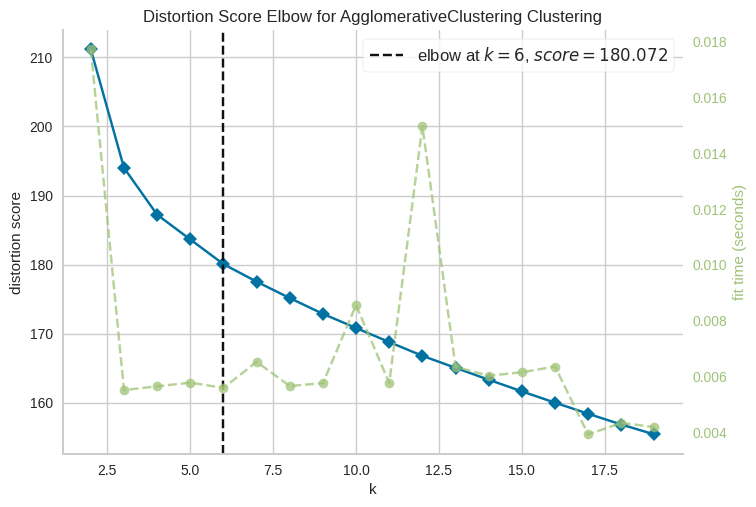

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick

from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = AgglomerativeClustering(
    #random_state=42
    )
visualizer = KElbowVisualizer(km, k=(2,20))

visualizer.fit(edge_model.covariance_)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick

from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(
    random_state=42
    )
visualizer = KElbowVisualizer(km, k=(2,20))

visualizer.fit(edge_model.covariance_)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax=np.ravel(ax)

for num, i in enumerate([4, 5, 6, 7]):
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[num])
    visualizer.fit(edge_model.covariance_)

In [ ]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
clusters = km.fit_predict(edge_model.covariance_)

replace_corr={i:clusters[i] for i in range(200)}

In [ ]:
current_directory = os.getcwd()

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

with open('replace_correlationcluster_dict.pickle', 'wb') as handle:
    pickle.dump(replace_corr, handle, protocol=pickle.HIGHEST_PROTOCOL)
os.chdir(current_directory)

In [ ]:
clusters

array([3, 2, 0, 3, 4, 2, 2, 1, 3, 2, 3, 0, 2, 1, 4, 3, 3, 1, 0, 0, 2, 3,
       1, 1, 3, 3, 0, 1, 0, 2, 2, 0, 3, 2, 0, 3, 2, 3, 0, 4, 3, 1, 0, 2,
       2, 4, 3, 2, 4, 2, 2, 2, 2, 3, 3, 4, 2, 3, 4, 2, 3, 0, 0, 3, 0, 2,
       2, 0, 3, 0, 0, 0, 1, 2, 3, 4, 2, 2, 0, 2, 0, 0, 0, 1, 4, 0, 0, 1,
       3, 1, 4, 3, 0, 0, 0, 1, 1, 0, 2, 3, 0, 0, 2, 3, 2, 3, 4, 0, 2, 3,
       0, 2, 4, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 3, 0, 4, 0,
       3, 4, 0, 3, 0, 2, 0, 2, 1, 1, 2, 0, 3, 3, 0, 2, 2, 3, 3, 4, 0, 0,
       2, 0, 0, 4, 0, 2, 3, 0, 3, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 0, 3, 4,
       4, 0, 3, 3, 0, 2, 2, 1, 2, 3, 3, 2, 2, 0, 3, 3, 3, 4, 3, 3, 0, 3,
       3, 2], dtype=int32)

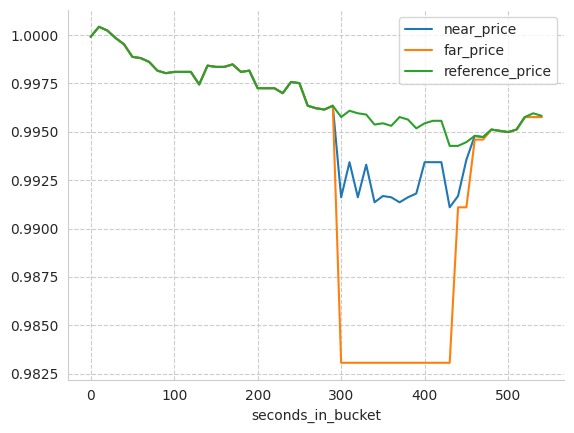

In [ ]:
sec = np.random.randint(200)
day = np.random.randint(481)
train_prices = train.query('stock_id ==@sec & date_id ==@day')[['seconds_in_bucket','near_price','far_price','reference_price']].set_index('seconds_in_bucket').replace(0, np.nan)
train_prices.plot();

In [ ]:
train_prices

In [ ]:
gc.collect()

0

## 4.0 Features Analysis:

In [16]:
dict_cat = {cl:"int32" for cl in ['time_id', 'stock_id', 'date_id', 'vol_cluster', 'corr_cluster',"vol_bucket", "seconds_in_bucket","imbalance_buy_sell_flag"]}

float_cols =  ['ask_price', 'ask_size', 'bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far', 'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size', 'near_price', 'reference_price', 'target', 'wap', 'imbalance1', 'imbalance2', 'imbalance_ratio', 'volume',
               'ask_priceXsize', 'bidask_priceXsize', 'near_price-far_price', 'imbalance_near_price_far_price', 'ask_price-reference_price', 'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price', 'imbalance_wap_reference_price', 'wap*near_price', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
                'wap-bid_price', "mov_average_st", "mov_average_lt", 'tree_feat_v0','tree_feat_v1', 'cum_price_dlag0','cum_price_dlag1', 'cum_price_dlag2', 'cum_price_dlag3', 'cum_price_dlag4', 'cum_price_dlag5', 'cum_price_dlag6', 'cum_price_dlag7', 'cum_price_dlag8', 'cum_price_dlag9', 'cum_price_dlag10', 'cum_price_dlag11', 'cum_price_dlag12', 'cum_price_dlag13', 'cum_price_dlag14',
                'cum_price_dlag15', 'cum_price_dlag16', 'cum_price_dlag17', 'cum_price_dlag18', 'cum_price_dlag19', 'rsi_dlag0', 'rsi_dlag1', 'rsi_dlag2', 'rsi_dlag3', 'rsi_dlag4', 'rsi_dlag5', 'rsi_dlag6', 'rsi_dlag7', 'rsi_dlag8', 'rsi_dlag9', 'rsi_dlag10', 'rsi_dlag11', 'rsi_dlag12', 'rsi_dlag13', 'rsi_dlag14', 'rsi_dlag15', 'rsi_dlag16', 'rsi_dlag17', 'rsi_dlag18', 'rsi_dlag19']

dict_float = {cl:"float32" for cl in float_cols}

datatype_dict = {**dict_cat, **dict_float}

In [17]:
%%time
train=pd.read_csv("train_extended.csv", dtype = datatype_dict)
train.head(3)

CPU times: user 1min 41s, sys: 10.2 s, total: 1min 51s
Wall time: 2min 10s


time_id  stock_id  date_id  ask_price  ask_size  bid_ask_size_spread  \
0        0         0        0   1.000026  9.047119            -1.965797   
1        0         1        0   1.000660  9.933342             1.851855   
2        0         2        0   1.000298  9.851984            -0.692226   

   bid_price   bid_size  check_near_far  dispersion  ...  rsi_dlag10  \
0   0.999812  11.012917             1.0         0.0  ...         0.0   
1   0.999896   8.081488             1.0         0.0  ...         0.0   
2   0.999403  10.544209             1.0         0.0  ...       100.0   

   rsi_dlag11  rsi_dlag12  rsi_dlag13  rsi_dlag14  rsi_dlag15  rsi_dlag16  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2       100.0       100.0       100.0       100.0       100.0       100.0   

   rsi_dlag17  rsi_dlag18  rsi_dlag19  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2       100.0       100.0       100.0  

[3 rows x 84 columns]

In [18]:
cat_cols = [c for c in train.columns if train[c].dtypes=="int32"]
float_cols = [c for c in train.columns if train[c].dtypes=="float32"]

In [19]:
#train.rename({"cum_price":"cum_price_dlag0","rsi":"rsi_dlag0"}, axis=1,inplace=True)
train.info()
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237892 entries, 0 to 5237891
Data columns (total 84 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   time_id                              int32  
 1   stock_id                             int32  
 2   date_id                              int32  
 3   ask_price                            float32
 4   ask_size                             float32
 5   bid_ask_size_spread                  float32
 6   bid_price                            float32
 7   bid_size                             float32
 8   check_near_far                       float32
 9   dispersion                           float32
 10  eq_wgt_index                         float32
 11  far_price                            float32
 12  imbalance_buy_sell_flag              int32  
 13  imbalance_size_sign                  float32
 14  imbalance_size_sign_delta            float32
 15  matched_size                    

176

In [20]:
#train.to_csv("train_extended.csv", index=False)

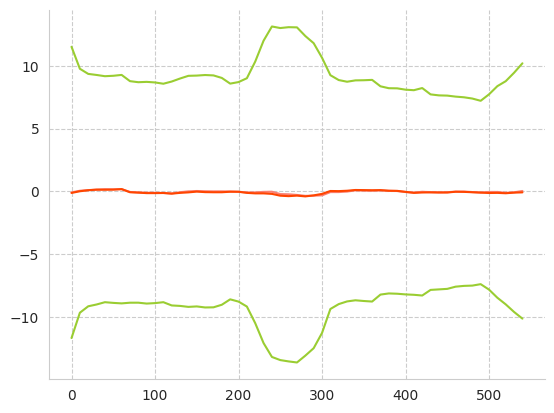

In [21]:
target_averages = train.groupby(["seconds_in_bucket"])["target"].agg(["mean","median","std","min","max"])

plt.plot(target_averages["mean"], color="salmon")
plt.plot(target_averages["median"], color="orangered")
#plt.plot(target_averages["max"], color="royalblue")
#plt.plot(target_averages["min"], color="royalblue")
plt.plot(target_averages["mean"]+target_averages["std"], color="yellowgreen")
plt.plot(target_averages["mean"]-target_averages["std"], color="yellowgreen")

In [22]:
def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()


#### 4.1 **ASK_PRICE**

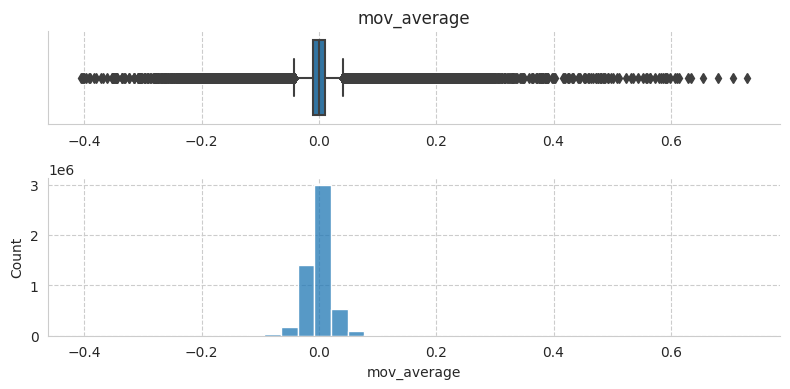

In [ ]:
plot_boxplot_and_hist(train,"mov_average_st")

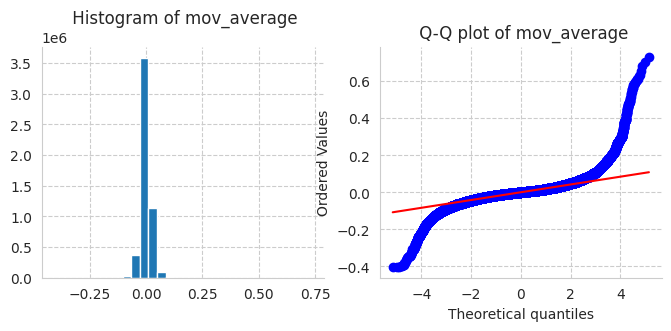

<Figure size 640x480 with 0 Axes>

In [ ]:
diagnostic_plots(train, "mov_average_st")

In [ ]:
gc.collect()

8470

#### **4.2 ASK_SIZE**

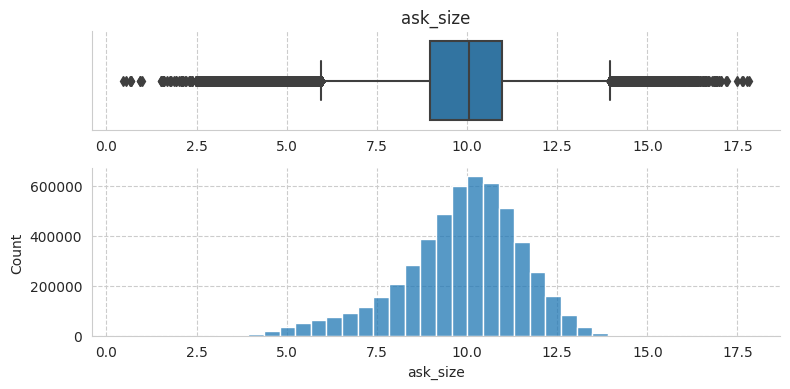

In [ ]:
plot_boxplot_and_hist(train,"ask_size")

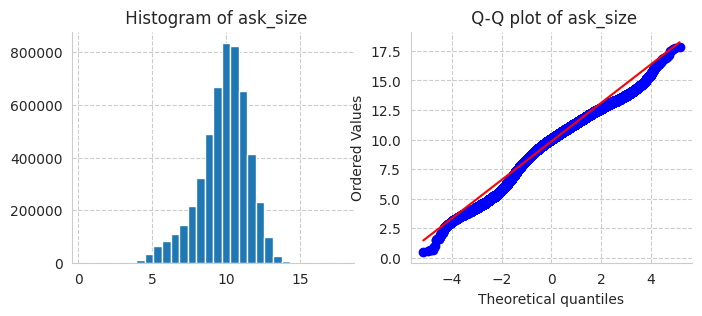

<Figure size 640x480 with 0 Axes>

In [ ]:
diagnostic_plots(train, "ask_size")

In [ ]:
#train_tf=train[["ask_size"]].copy()
#train_tf = np.log(train_tf)

In [ ]:
#diagnostic_plots(train_tf, "ask_size")

#### **4.3 BID_SIZE**

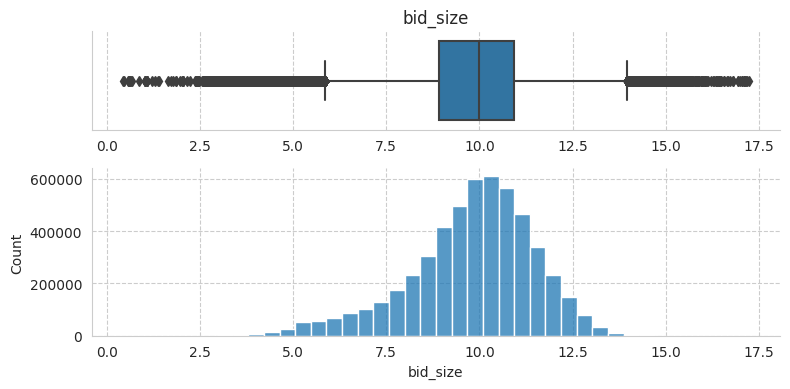

In [ ]:
plot_boxplot_and_hist(train,"bid_size")

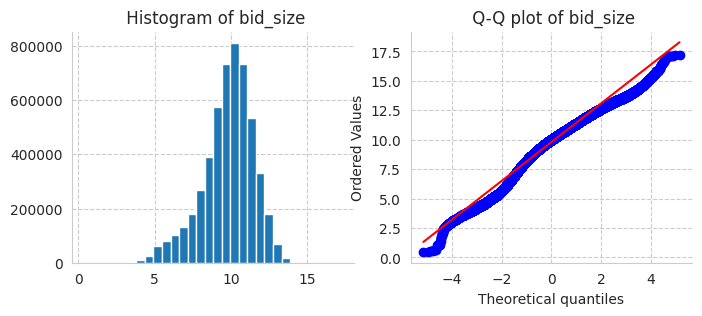

<Figure size 640x480 with 0 Axes>

In [ ]:
diagnostic_plots(train, "bid_size")

In [ ]:
#train_tf=train[["bid_size"]].copy()
#train_tf = np.log(train_tf+1)

In [ ]:
#diagnostic_plots(train_tf, "bid_size")

#### **4.4 IMBALANCE_SIZE**

In [ ]:
train[["imbalance_size_sign"]].describe()

imbalance_size_sign
count         5.237892e+06
mean         -2.053632e-01
std           1.287121e+01
min          -2.181587e+01
25%          -1.401260e+01
50%           0.000000e+00
75%           1.383321e+01
max           2.092919e+01

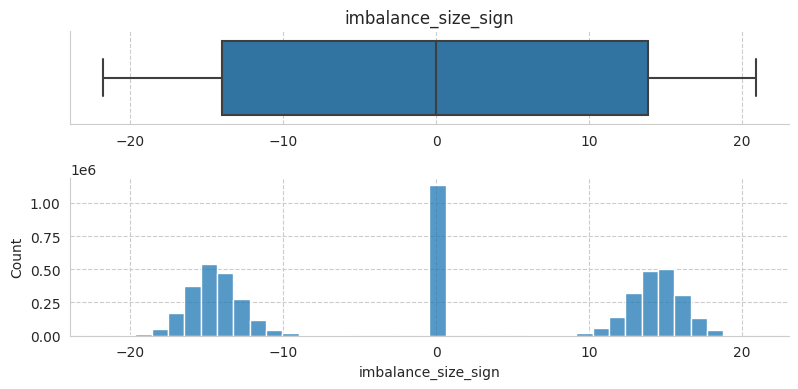

In [ ]:
plot_boxplot_and_hist(train,"imbalance_size_sign")

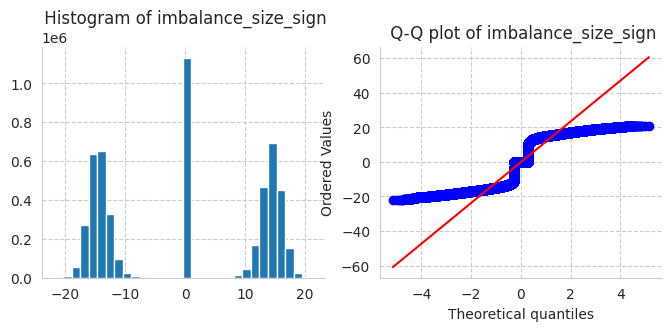

<Figure size 640x480 with 0 Axes>

In [ ]:
diagnostic_plots(train, "imbalance_size_sign")

In [ ]:
#train_tf=train[["imbalance_size_sign"]].copy()
#train_tf = np.log(train_tf+1)
#train_tf.describe()

In [ ]:
#diagnostic_plots(train, "imbalance_size")

In [ ]:
#from sklearn.preprocessing import PowerTransformer

#transformer = PowerTransformer(method ="yeo-johnson", standardize = True)
#transformer.fit(train_tf)
#train_tf = transformer.transform(train_tf)
#train_tf = pd.DataFrame(train_tf, columns = ["imbalance_size_sign"])

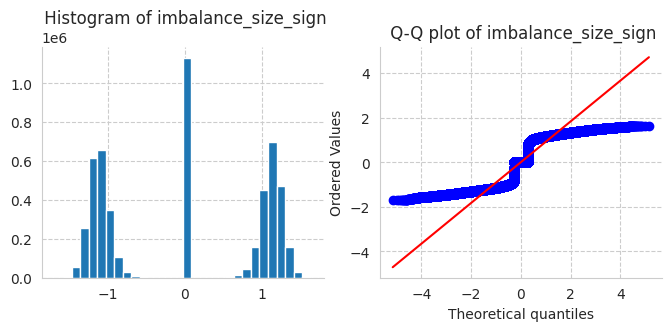

<Figure size 640x480 with 0 Axes>

In [ ]:
#diagnostic_plots(train_tf, "imbalance_size_sign")

#### **4.5 VOLUME**

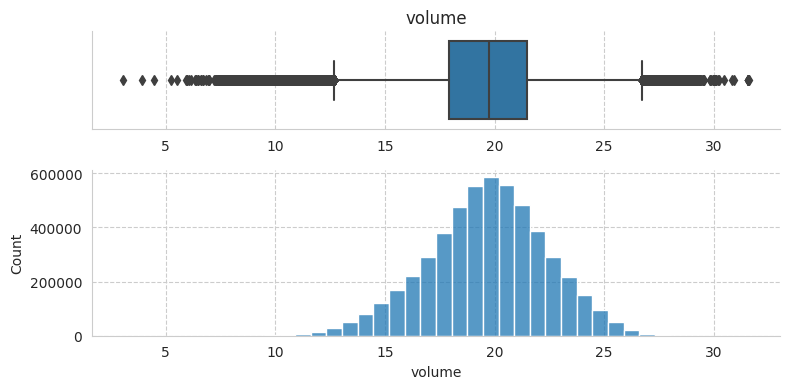

In [ ]:
plot_boxplot_and_hist(train,"volume")

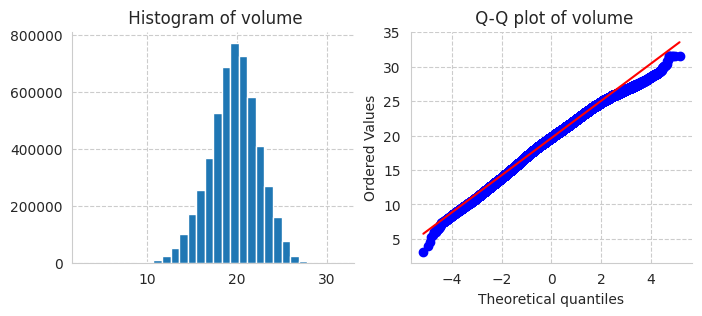

<Figure size 640x480 with 0 Axes>

In [ ]:
diagnostic_plots(train, "volume")

#### **4.6 ASK_PRICEXSIZE**                       

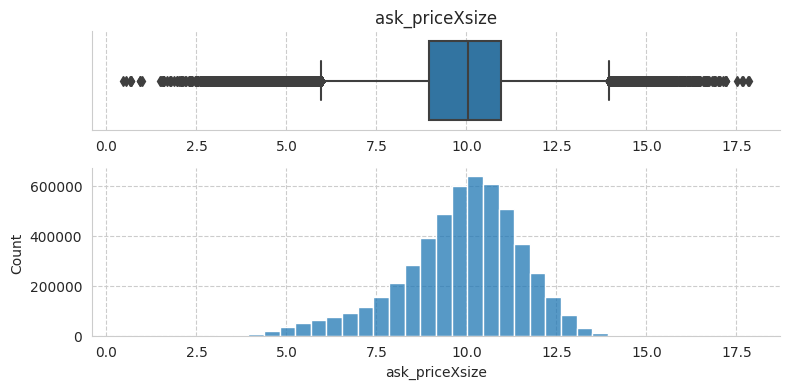

In [ ]:
plot_boxplot_and_hist(train,"ask_priceXsize")

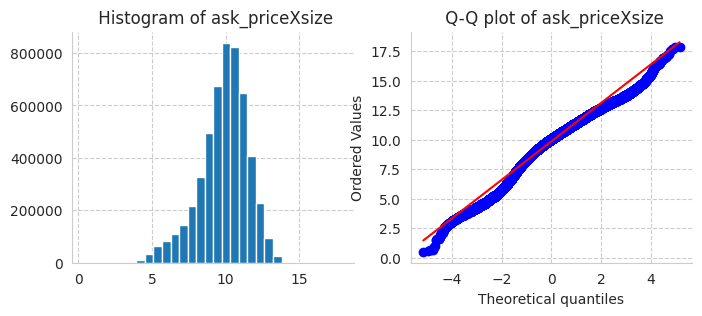

<Figure size 640x480 with 0 Axes>

In [ ]:
diagnostic_plots(train, "ask_priceXsize")

In [ ]:
#train_tf=train[["ask_priceXsize"]].copy()
#train_tf = np.log(train_tf)
#train_tf.describe()

In [ ]:
#diagnostic_plots(train_tf, "ask_priceXsize")

In [ ]:
#plot_boxplot_and_hist(train_tf,"ask_priceXsize")

#### **4.7 MATCHED_SIZE**

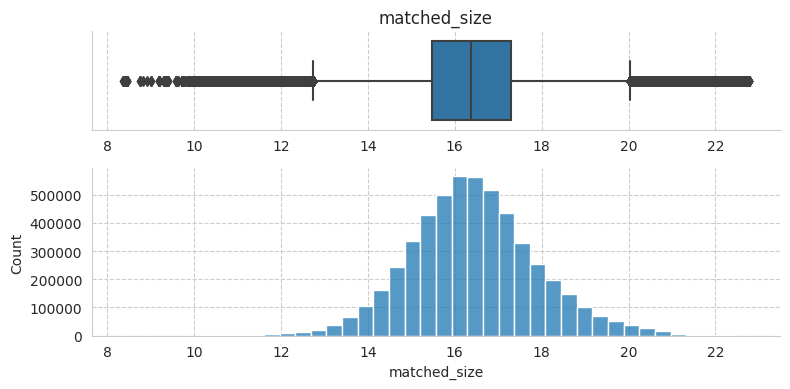

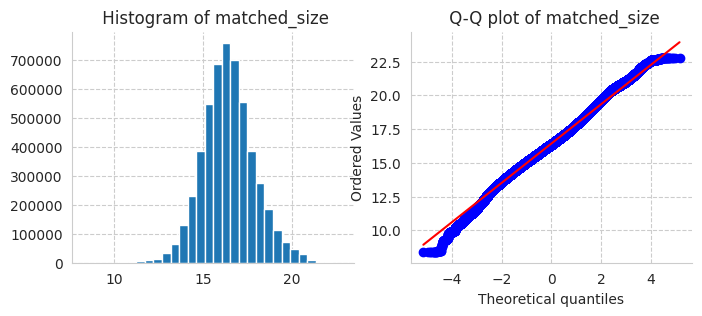

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"matched_size")
diagnostic_plots(train, "matched_size");

In [ ]:
#train_tf=train[["matched_size"]].copy()
#train_tf = np.log(train_tf)
#train_tf.describe()

In [ ]:
#diagnostic_plots(train_tf, "matched_size")
#plot_boxplot_and_hist(train_tf,"matched_size");

#### **4.8 BID_ASK_SIZE_SPREAD**

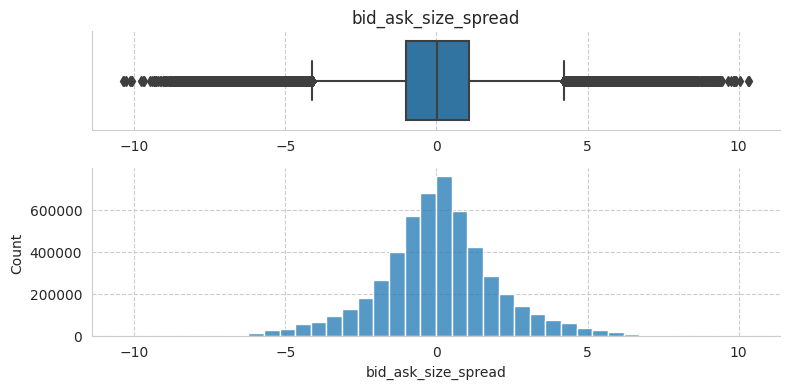

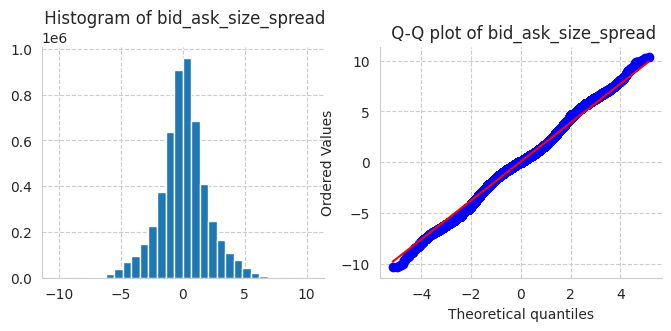

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"bid_ask_size_spread")
diagnostic_plots(train, "bid_ask_size_spread");

#### **4.9 FAR PRICE**

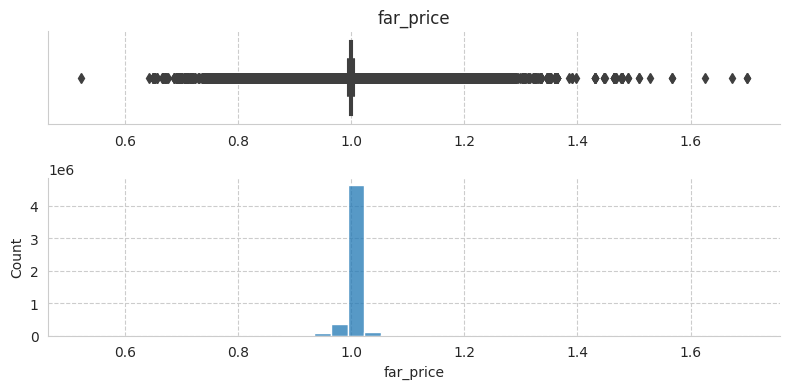

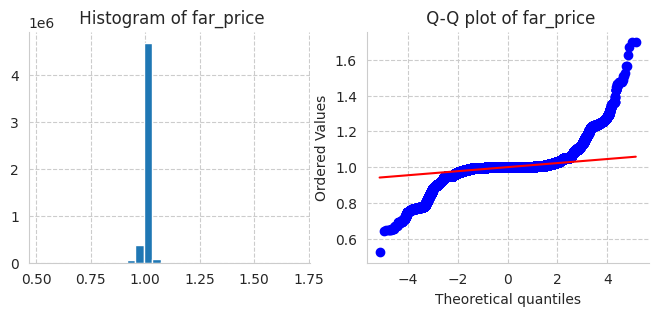

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"far_price")
diagnostic_plots(train, "far_price");

In [ ]:
#X_tf = train[["far_price"]].copy()

#transformer = FunctionTransformer(lambda x: np.power( x, 0.01))
#transformer.fit(X_tf)
#X_tf = transformer.transform(X_tf)

#X_tf = pd.DataFrame(X_tf,columns=["far_price"])

In [ ]:
#plot_boxplot_and_hist(X_tf,"far_price")
#diagnostic_plots(X_tf, "far_price");

#### **4.10 NEAR PRICE**

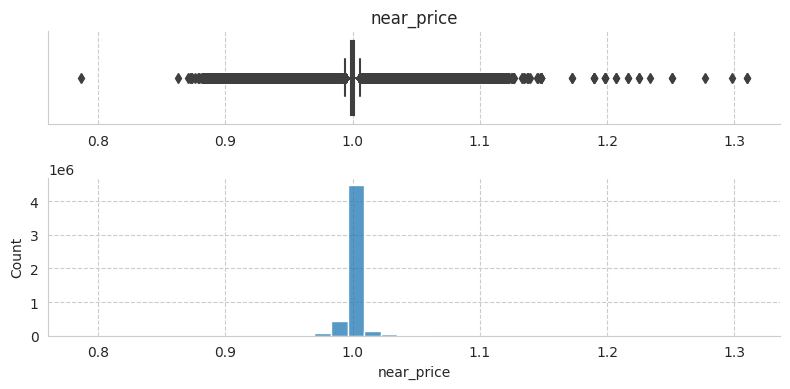

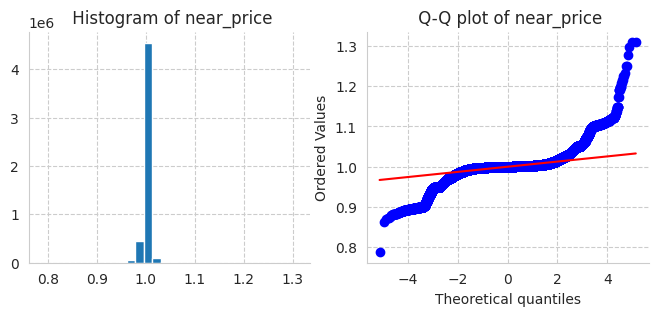

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"near_price")
diagnostic_plots(train, "near_price");

#### **4.11 DISPERSION**

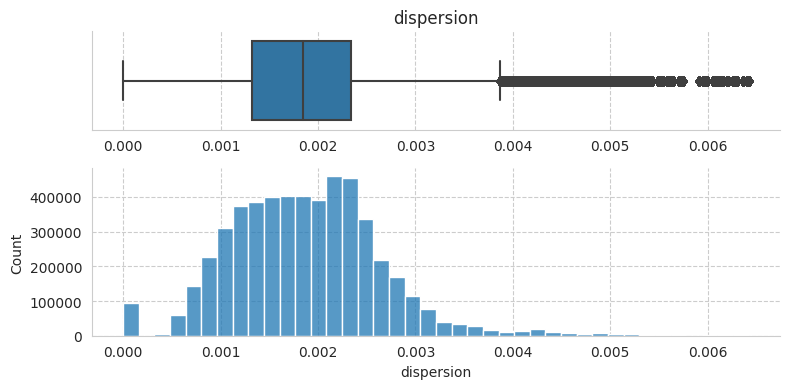

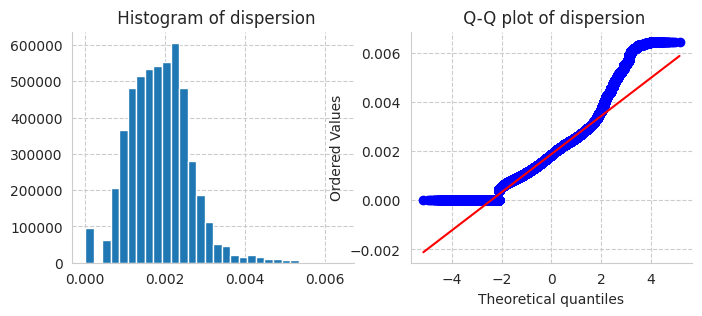

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"dispersion")
diagnostic_plots(train, "dispersion");

In [ ]:
train_tf=train[["dispersion"]].copy()
train_tf = np.log(train_tf*1000+1.0)

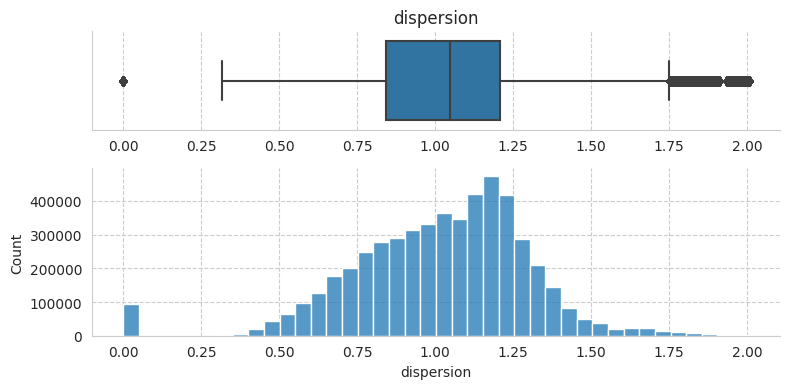

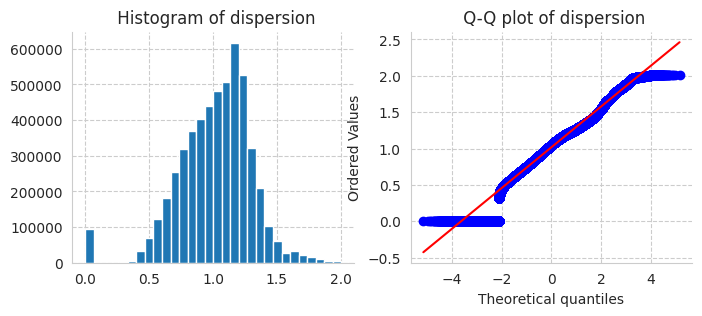

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_tf,"dispersion")
diagnostic_plots(train_tf, "dispersion");

#### **4.12 eq_wgt_index**

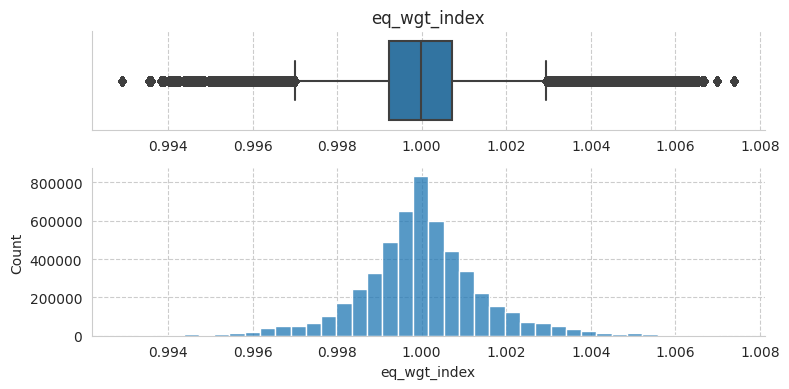

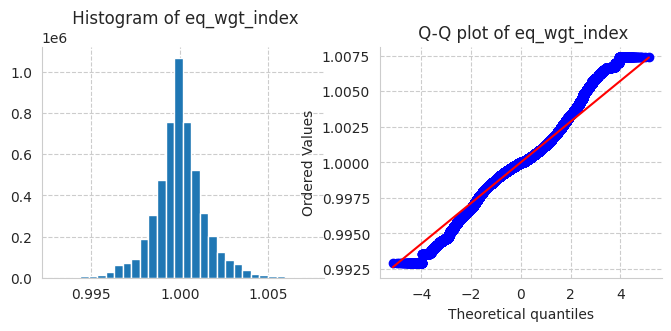

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"eq_wgt_index")
diagnostic_plots(train, "eq_wgt_index");

#### **4.13 reference_price**

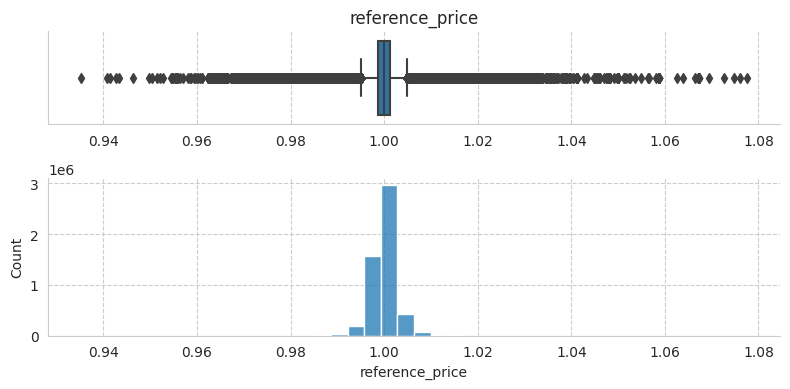

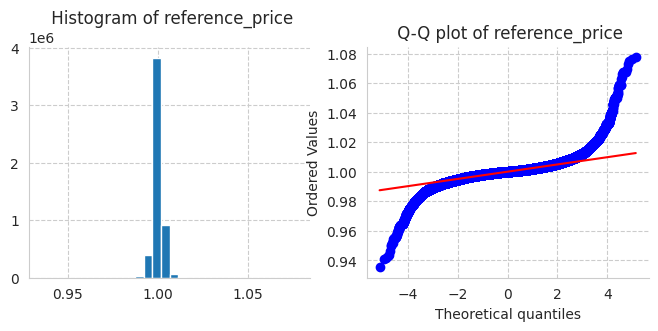

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"reference_price")
diagnostic_plots(train, "reference_price");

#### **4.14 wap**

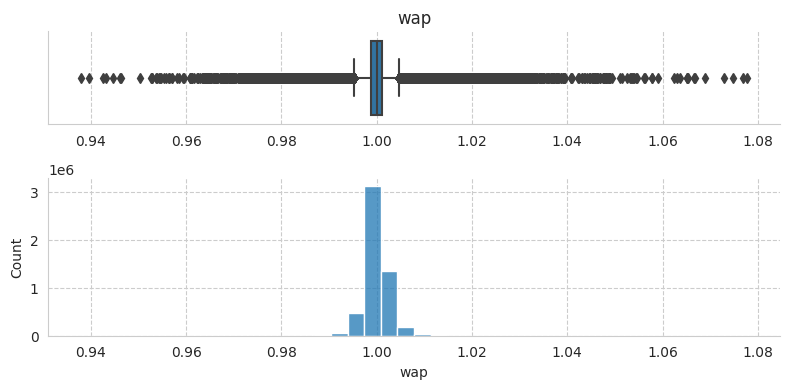

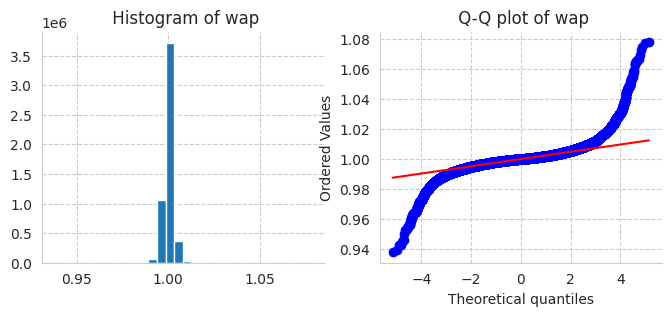

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"wap")
diagnostic_plots(train, "wap");

#### **4.15 imbalance1**

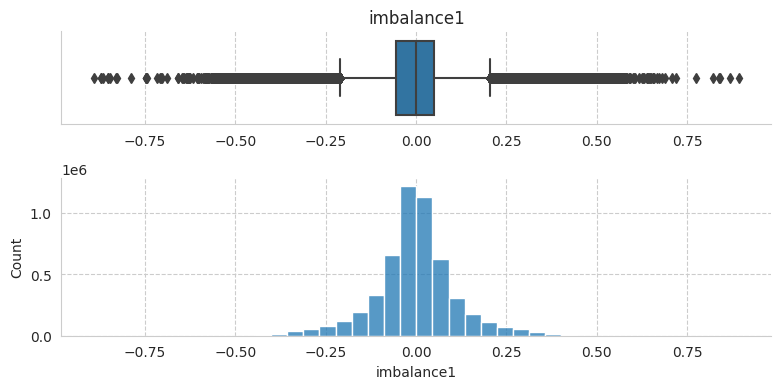

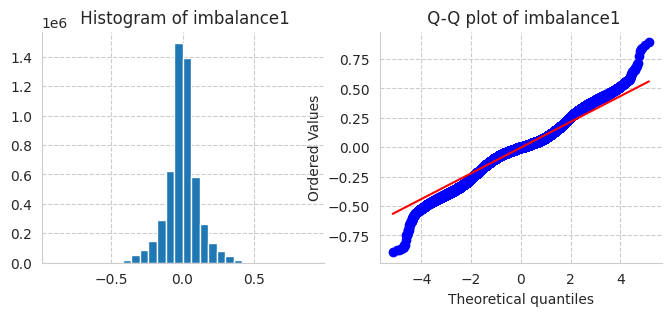

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance1")
diagnostic_plots(train, "imbalance1");

#### **4.16 bidask_priceXsize**

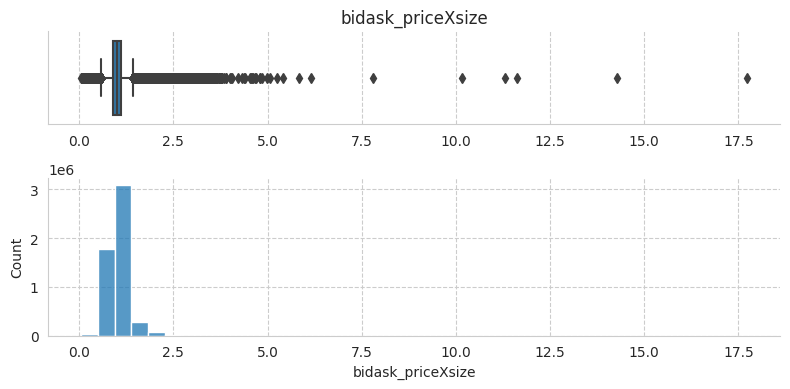

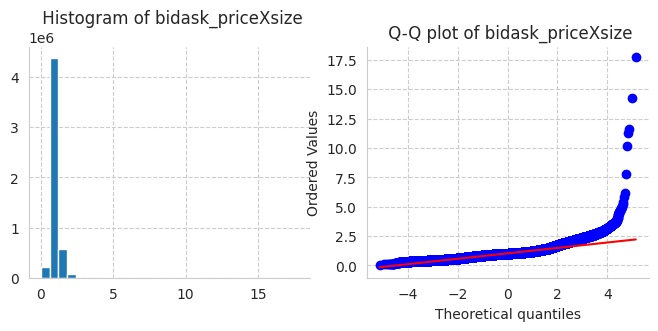

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"bidask_priceXsize")
diagnostic_plots(train, "bidask_priceXsize");

In [ ]:
train_tf=train[["bidask_priceXsize"]].copy()
train_tf = np.log(train_tf)
train_tf.describe()

bidask_priceXsize
count       5.237892e+06
mean       -6.200253e-03
std         2.277965e-01
min        -2.865388e+00
25%        -1.090240e-01
50%        -1.927832e-03
75%         9.844884e-02
max         2.874898e+00

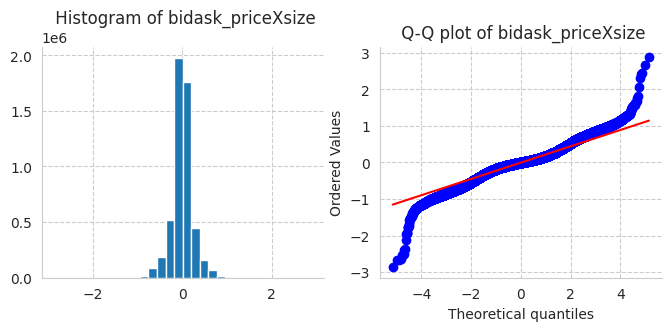

<Figure size 640x480 with 0 Axes>

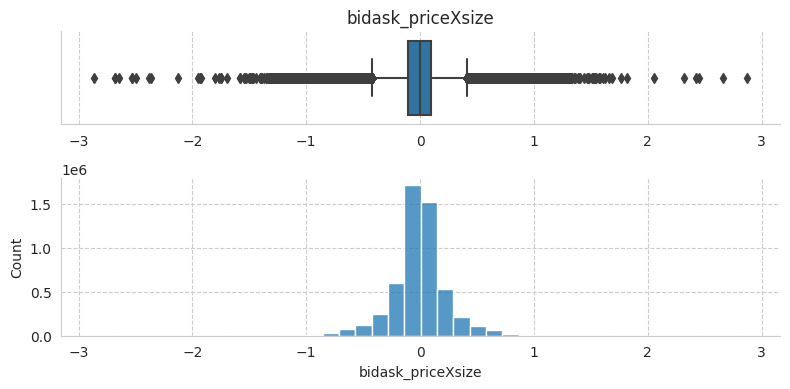

In [ ]:
diagnostic_plots(train_tf, "bidask_priceXsize")
plot_boxplot_and_hist(train_tf,"bidask_priceXsize");

#### **4.17 imbalance_near_price_far_price**

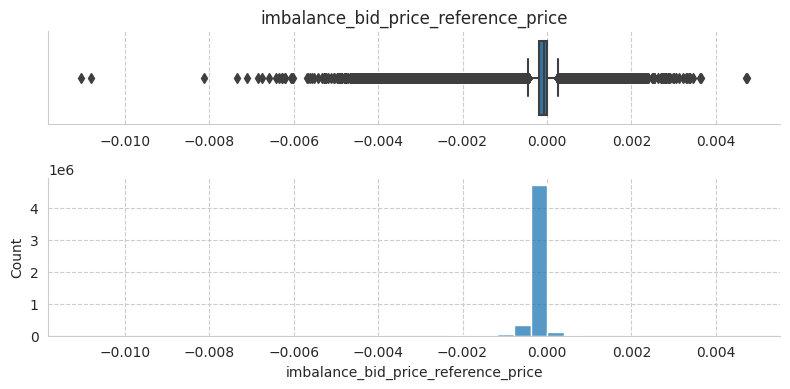

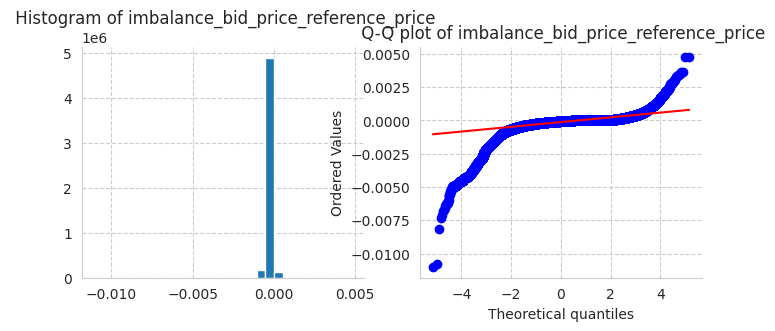

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance_bid_price_reference_price")
diagnostic_plots(train, "imbalance_bid_price_reference_price");

In [ ]:
train_tf=train[["imbalance_bid_price_reference_price"]].copy()
train_tf = np.log(train_tf+1)
train_tf.describe()

imbalance_bid_price_reference_price
count                         5.237892e+06
mean                         -1.346413e-04
std                           2.281820e-04
min                          -1.108901e-02
25%                          -1.784126e-04
50%                          -7.641607e-05
75%                           0.000000e+00
max                           4.722157e-03

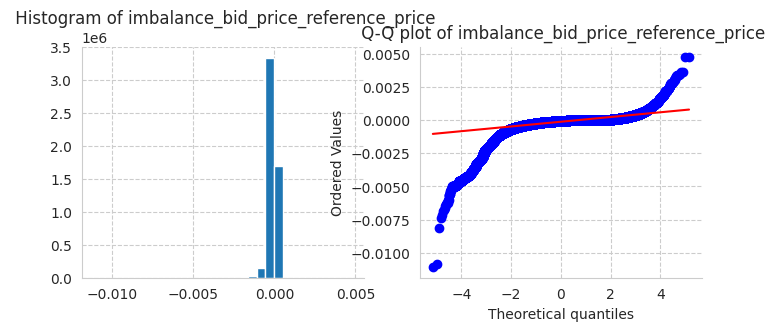

<Figure size 640x480 with 0 Axes>

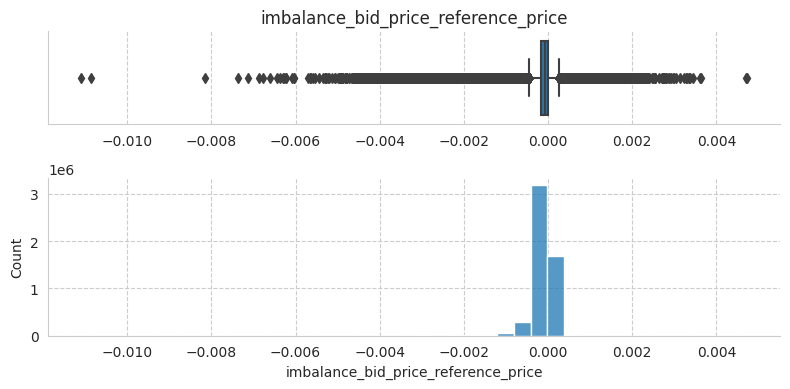

In [ ]:
diagnostic_plots(train_tf, "imbalance_bid_price_reference_price")
plot_boxplot_and_hist(train_tf,"imbalance_bid_price_reference_price");

#### 4.18 imbalance_bid_price_reference_price         

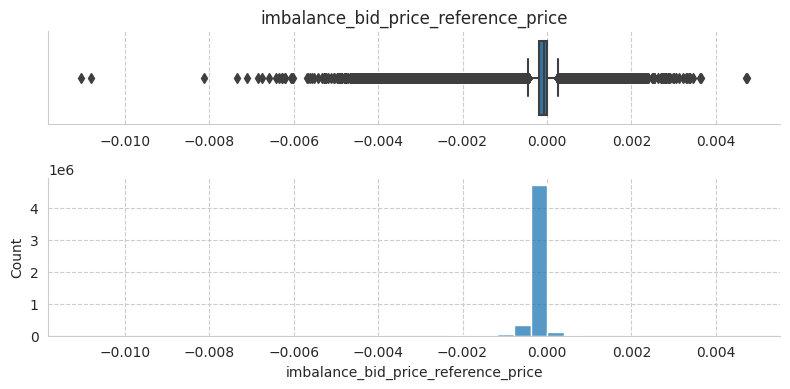

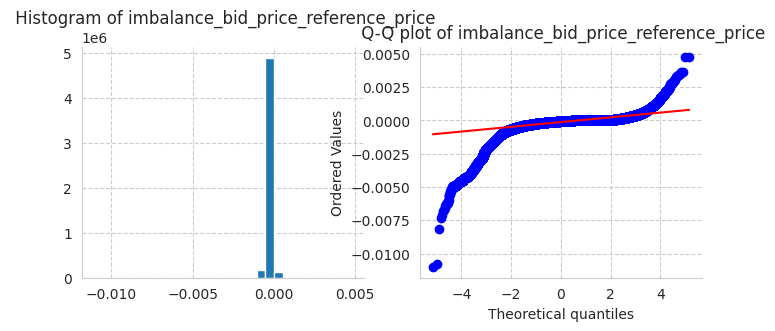

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance_bid_price_reference_price")
diagnostic_plots(train, "imbalance_bid_price_reference_price");

In [ ]:
train_tf=train[["imbalance_bid_price_reference_price"]].copy()
train_tf = np.log(train_tf+1)
train_tf.describe()

imbalance_bid_price_reference_price
count                         5.237892e+06
mean                         -1.346413e-04
std                           2.281820e-04
min                          -1.108901e-02
25%                          -1.784126e-04
50%                          -7.641607e-05
75%                           0.000000e+00
max                           4.722157e-03

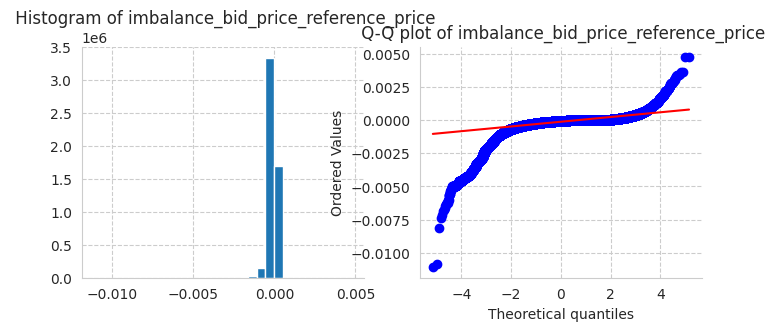

<Figure size 640x480 with 0 Axes>

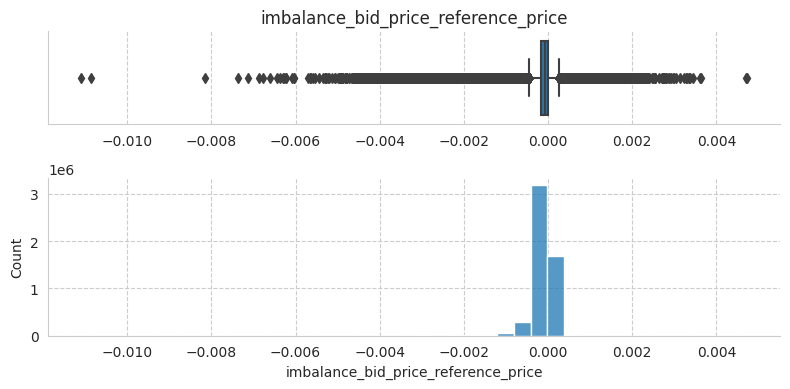

In [ ]:
diagnostic_plots(train_tf, "imbalance_bid_price_reference_price")
plot_boxplot_and_hist(train_tf,"imbalance_bid_price_reference_price");

In [ ]:
train_tf=train[["imbalance_bid_price_reference_price"]].copy()
train_tf = np.log(train_tf+1)
train_tf.describe()

imbalance_bid_price_reference_price
count                         5.237892e+06
mean                         -1.346413e-04
std                           2.281820e-04
min                          -1.108901e-02
25%                          -1.784126e-04
50%                          -7.641607e-05
75%                           0.000000e+00
max                           4.722157e-03

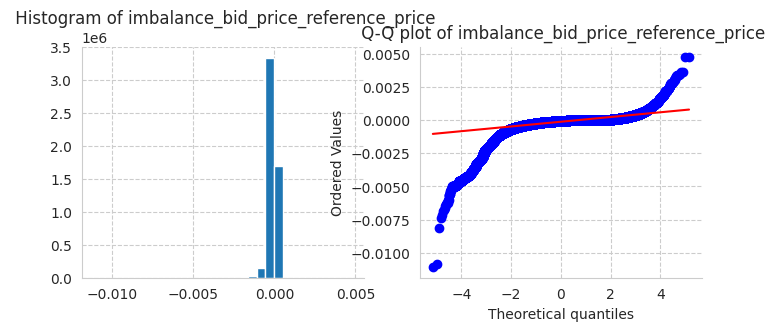

<Figure size 640x480 with 0 Axes>

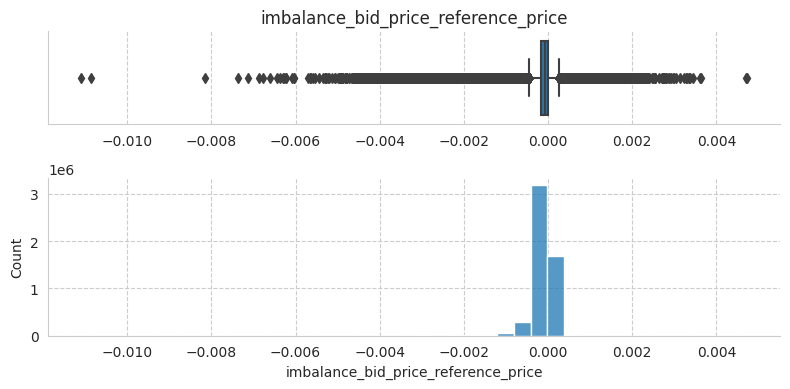

In [ ]:
diagnostic_plots(train_tf, "imbalance_bid_price_reference_price")
plot_boxplot_and_hist(train_tf,"imbalance_bid_price_reference_price");

#### 4.20 wap-bid_price         

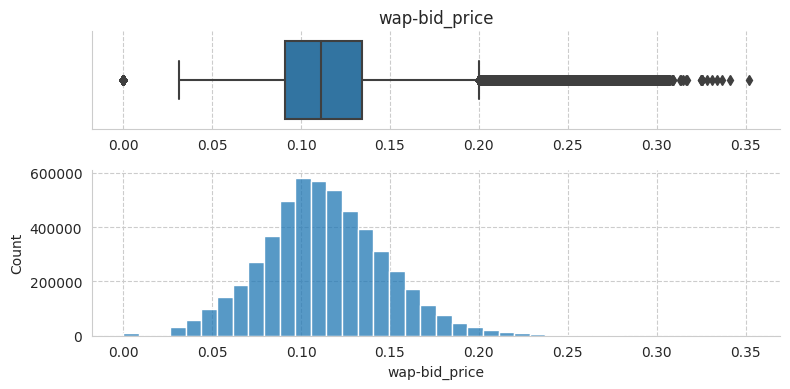

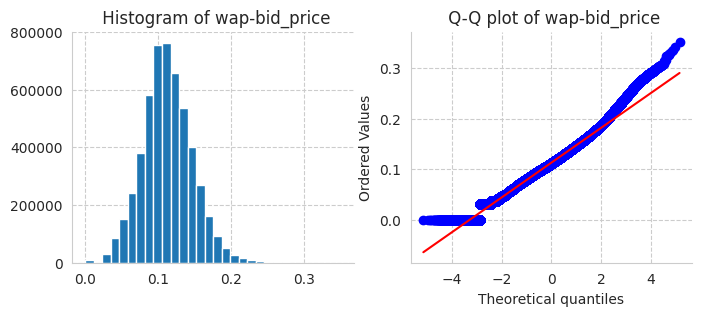

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"wap-bid_price")
diagnostic_plots(train, "wap-bid_price");

In [ ]:
train_tf=train[["wap-bid_price"]].copy()
#transformer = FunctionTransformer( np.reciprocal)

transformer = FunctionTransformer(lambda x: np.power( x, 0.25))
#transformer.fit(X_tf)
train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["wap-bid_price"])

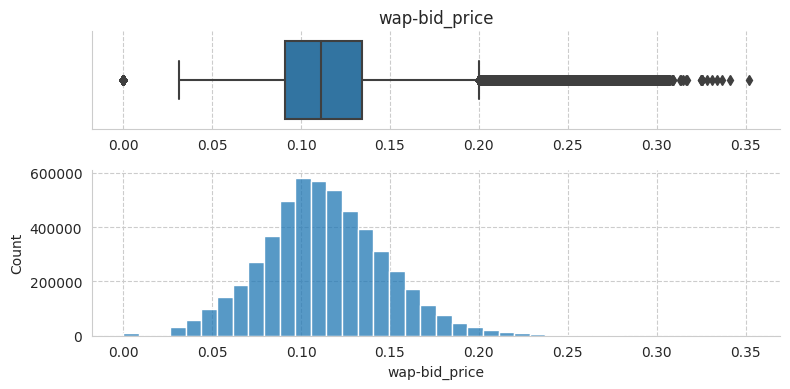

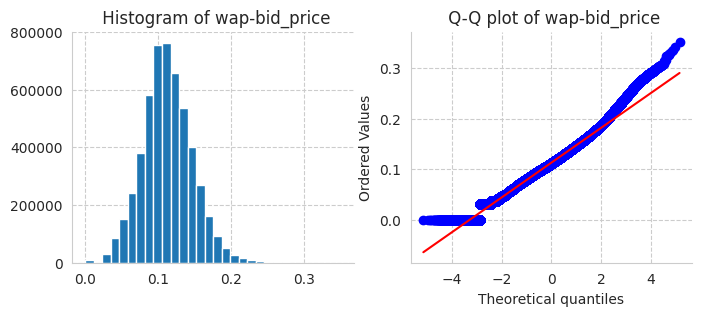

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_tf,"wap-bid_price")
diagnostic_plots(train_tf, "wap-bid_price");

#### 4.21 imbalance_wap_ask_price         

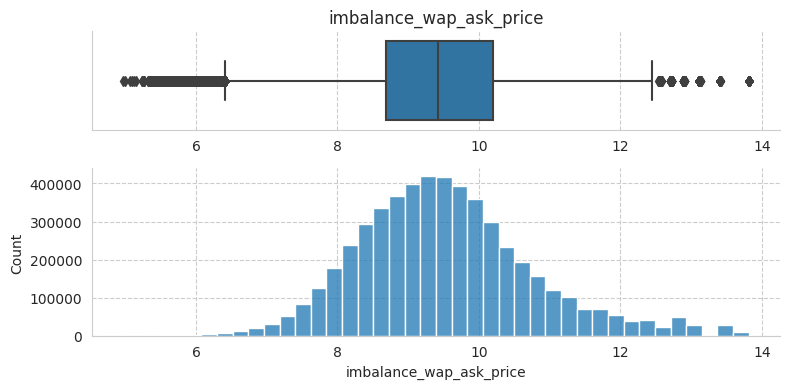

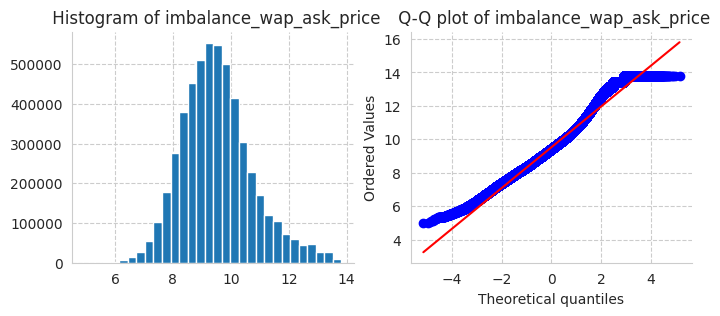

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance_wap_ask_price")
diagnostic_plots(train, "imbalance_wap_ask_price");

In [ ]:
train_tf=train[["imbalance_wap_ask_price"]].copy()
#transformer = FunctionTransformer( np.reciprocal)

transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(0.000001-x)))
#transformer.fit(X_tf)
train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["imbalance_wap_ask_price"])
train_tf

imbalance_wap_ask_price
0                      11.176465
1                       8.013721
2                       8.805023
3                       9.133485
4                      11.618293
...                          ...
5237887                 9.826900
5237888                10.090655
5237889                10.027246
5237890                 9.189655
5237891                 9.346203

[5237892 rows x 1 columns]

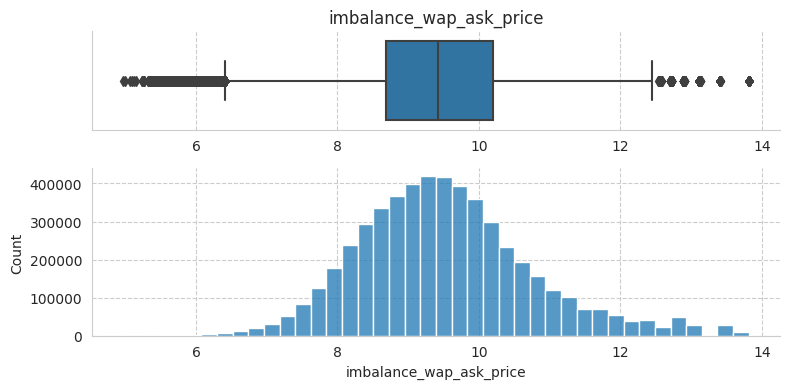

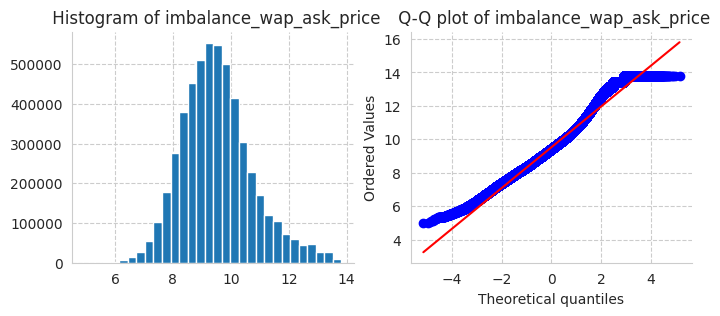

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_tf,"imbalance_wap_ask_price")
diagnostic_plots(train_tf, "imbalance_wap_ask_price");

#### 4.22 imbalance_wap_near_price         

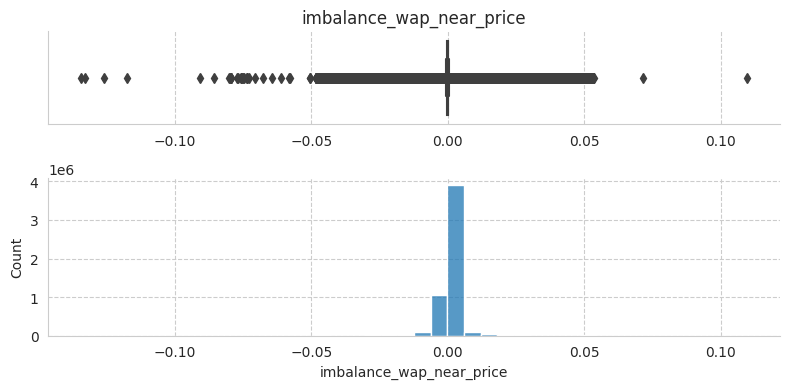

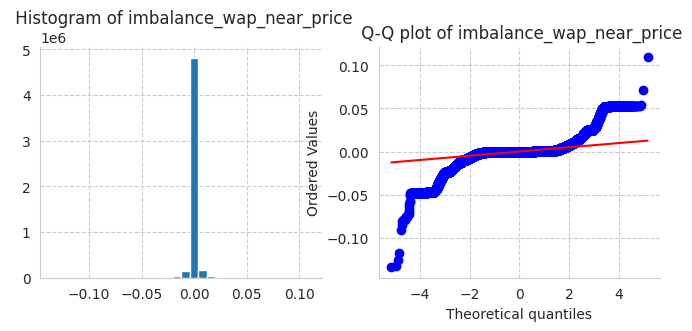

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance_wap_near_price")
diagnostic_plots(train, "imbalance_wap_near_price");

#### 4.23 wap*near_price         

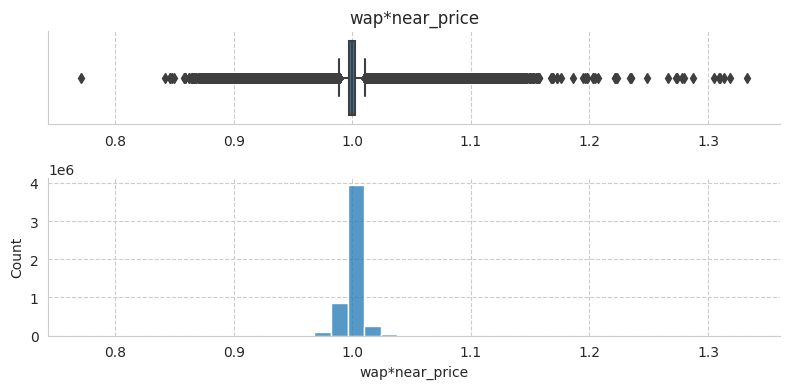

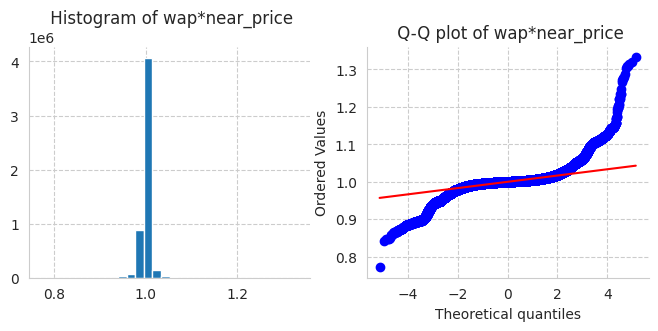

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"wap*near_price")
diagnostic_plots(train, "wap*near_price");

#### 4.24 imbalance_wap_reference_price         

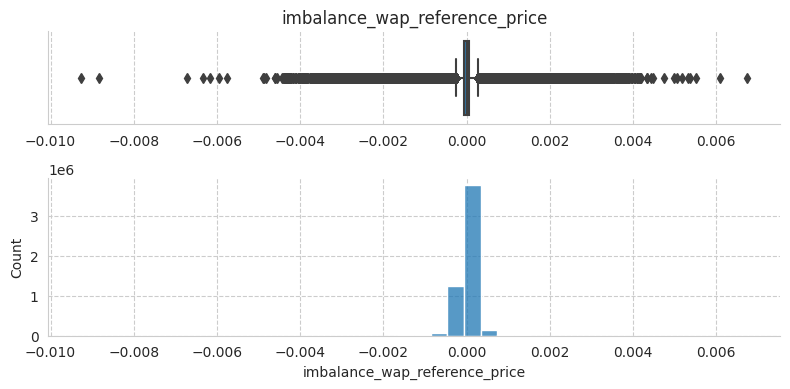

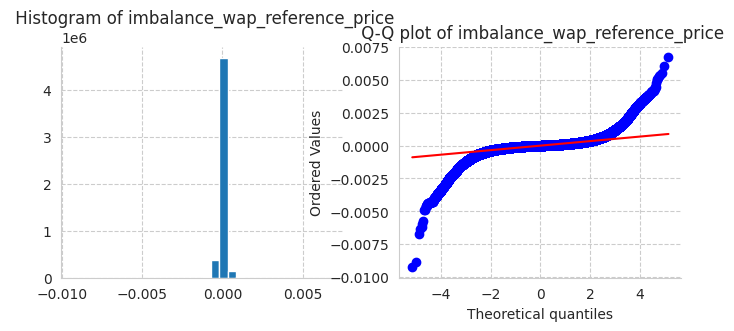

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance_wap_reference_price")
diagnostic_plots(train, "imbalance_wap_reference_price");

#### 4.25 imbalance_bid_price_ask_price         

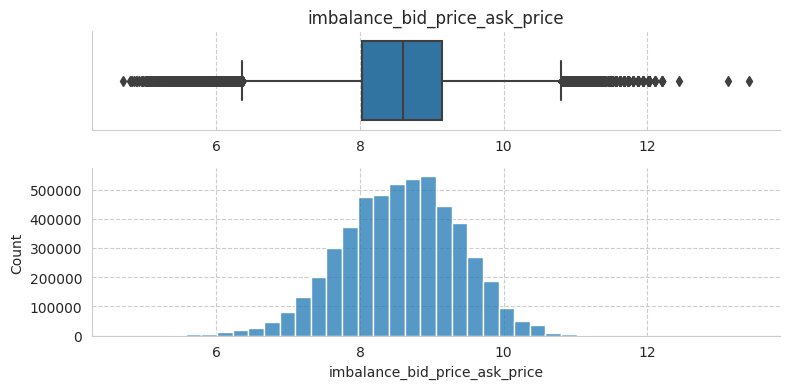

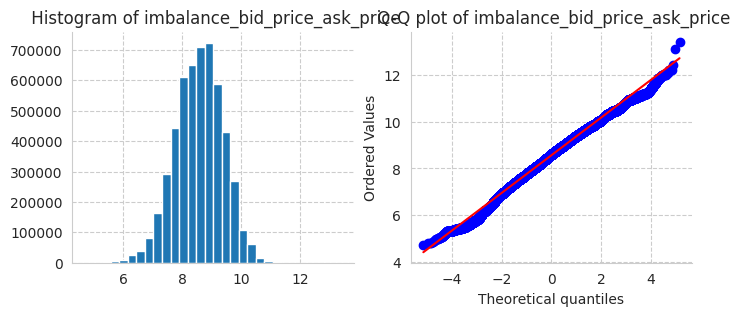

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance_bid_price_ask_price")
diagnostic_plots(train, "imbalance_bid_price_ask_price");

In [ ]:
train_tf=train[["imbalance_bid_price_ask_price"]].copy()
#transformer = FunctionTransformer( np.reciprocal)

transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
#transformer.fit(X_tf)
train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["imbalance_bid_price_ask_price"])
train_tf

imbalance_bid_price_ask_price
0                                  NaN
1                                  NaN
2                                  NaN
3                                  NaN
4                                  NaN
...                                ...
5237887                            NaN
5237888                            NaN
5237889                            NaN
5237890                            NaN
5237891                            NaN

[5237892 rows x 1 columns]

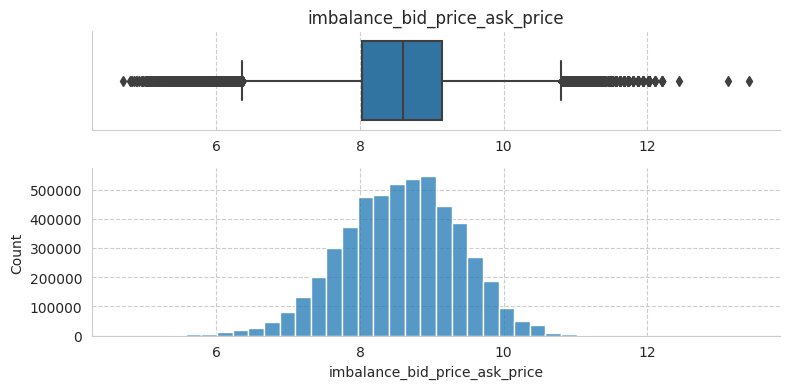

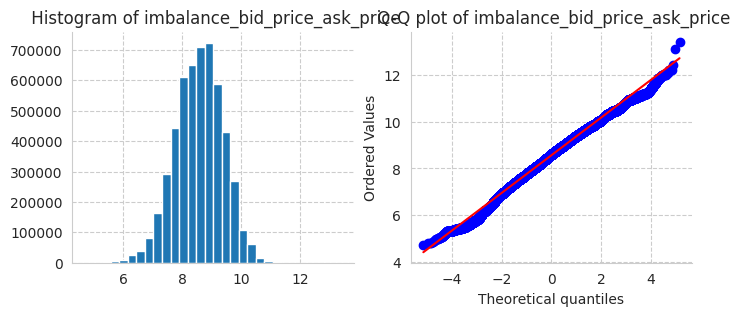

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_tf,"imbalance_bid_price_ask_price")
diagnostic_plots(train_tf, "imbalance_bid_price_ask_price");

#### 4.26 imbalance_bid_price_reference_price

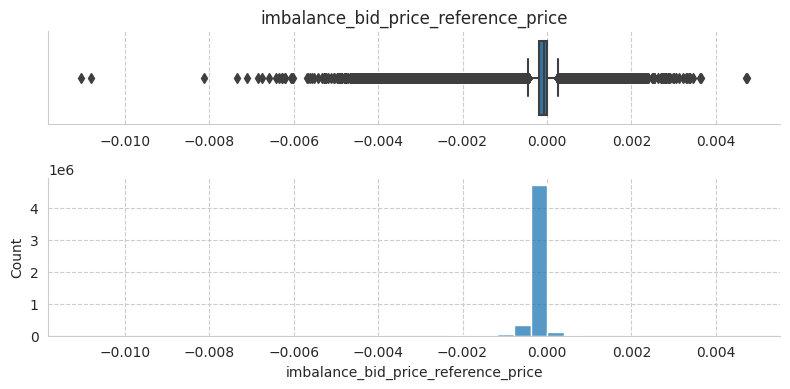

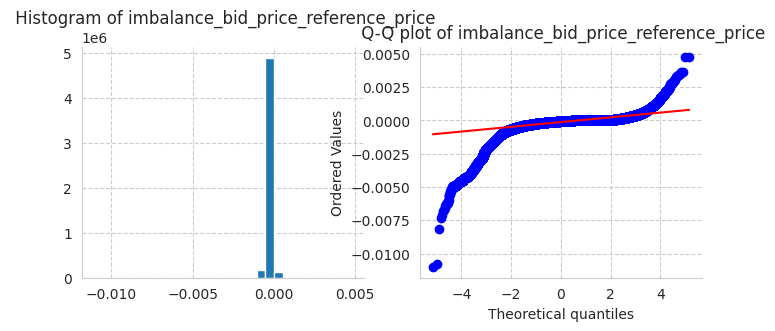

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"imbalance_bid_price_reference_price")
diagnostic_plots(train, "imbalance_bid_price_reference_price");

In [ ]:
train_tf=train[["imbalance_bid_price_reference_price"]].copy()
transformer = PowerTransformer( method ="yeo-johnson")
transformer.fit(train_tf)
train_tf = transformer.transform(train_tf)
transformer = FunctionTransformer(lambda x: np.log(x+10))
train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["imbalance_bid_price_reference_price"])
train_tf.isna().sum()

imbalance_bid_price_reference_price    0
dtype: int64

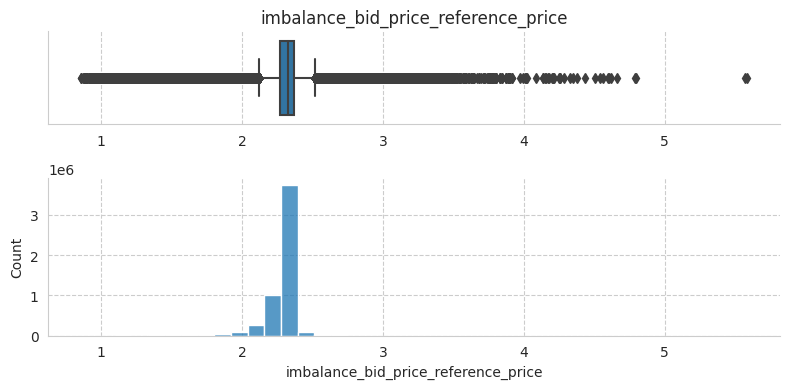

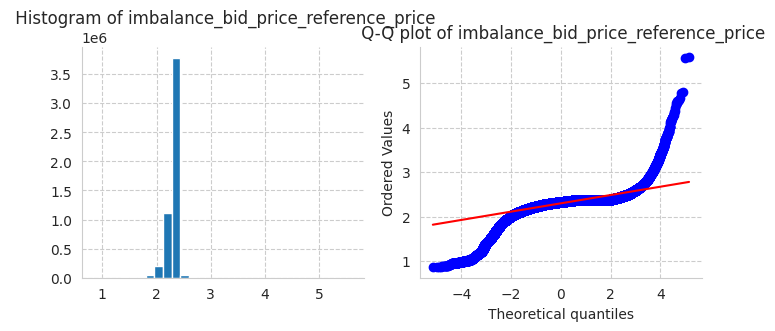

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_tf,"imbalance_bid_price_reference_price")
diagnostic_plots(train_tf, "imbalance_bid_price_reference_price");

In [ ]:
train_tf=train[["bid_price-ask_price","imbalance_bid_price_ask_price"]].copy()
#transformer = FunctionTransformer( np.reciprocal)

transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
#transformer.fit(X_tf)
train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["bid_price-ask_price","imbalance_bid_price_ask_price"])
train_tf["target"] = train["target"
train_tf.corr()

bid_price-ask_price  \
bid_price-ask_price                       1.000000   
imbalance_bid_price_ask_price             0.999995   
target                                   -0.003336   

                               imbalance_bid_price_ask_price    target  
bid_price-ask_price                                 0.999995 -0.003336  
imbalance_bid_price_ask_price                       1.000000 -0.003405  
target                                             -0.003405  1.000000

#### 4.27 ask_price-reference_price

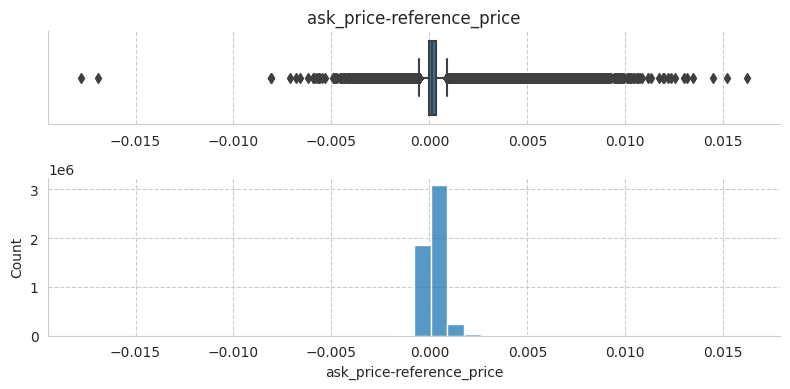

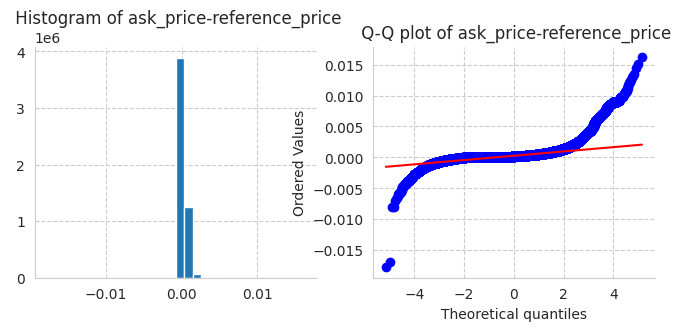

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"ask_price-reference_price")
diagnostic_plots(train, "ask_price-reference_price");

In [ ]:
train_tf=train[["ask_price-reference_price "]].copy()
#transformer = FunctionTransformer( np.reciprocal)

transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
#transformer.fit(X_tf)
train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["ask_price-reference_price"])
train_tf

bid_price-ask_price
0                   8.449534
1                   7.176943
2                   7.018687
3                   8.444873
4                   7.382570
...                      ...
5237887             9.053337
5237888             8.266435
5237889             9.272216
5237890             8.334871
5237891             8.053459

[5237892 rows x 1 columns]

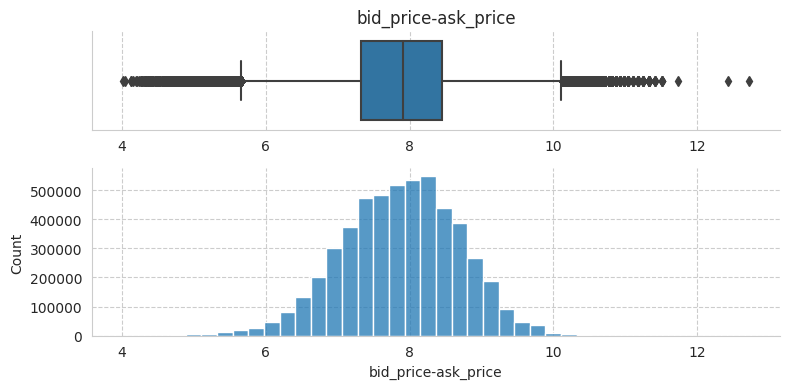

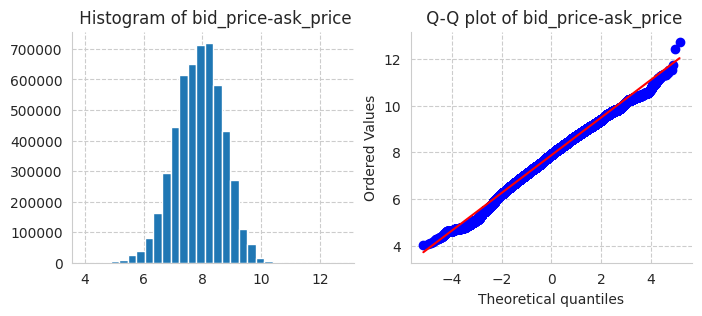

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_tf,"bid_price-ask_price")
diagnostic_plots(train_tf, "bid_price-ask_price");

In [ ]:
train_tf=train[["imbalance_bid_price_reference_price","ask_price-reference_price"]].copy()
#transformer = FunctionTransformer( np.reciprocal)

#transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
#transformer.fit(X_tf)
#train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["imbalance_bid_price_reference_price","ask_price-reference_price"])
train_tf["target"] = train["target"]
train_tf.corr()

imbalance_bid_price_reference_price  \
imbalance_bid_price_reference_price                             1.000000   
ask_price-reference_price                                       0.146590   
target                                                         -0.025834   

                                     ask_price-reference_price    target  
imbalance_bid_price_reference_price                   0.146590 -0.025834  
ask_price-reference_price                             1.000000 -0.023729  
target                                               -0.023729  1.000000

#### 4.28 imbalance_near_price_far_price

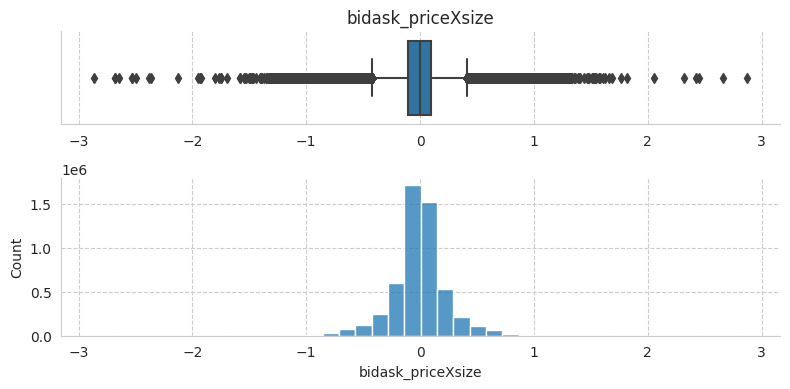

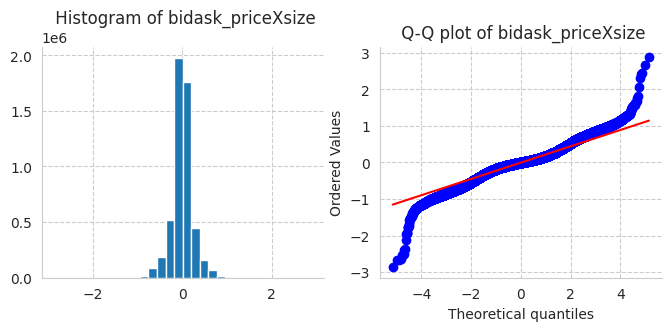

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train,"bidask_priceXsize")
diagnostic_plots(train, "bidask_priceXsize");

In [ ]:
train_tf=train[["ask_price-reference_price"]].copy()
#transformer = FunctionTransformer( np.reciprocal)

transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
#transformer.fit(X_tf)
train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["ask_price-reference_price"])
train_tf

bid_price-ask_price
0                   8.449534
1                   7.176943
2                   7.018687
3                   8.444873
4                   7.382570
...                      ...
5237887             9.053337
5237888             8.266435
5237889             9.272216
5237890             8.334871
5237891             8.053459

[5237892 rows x 1 columns]

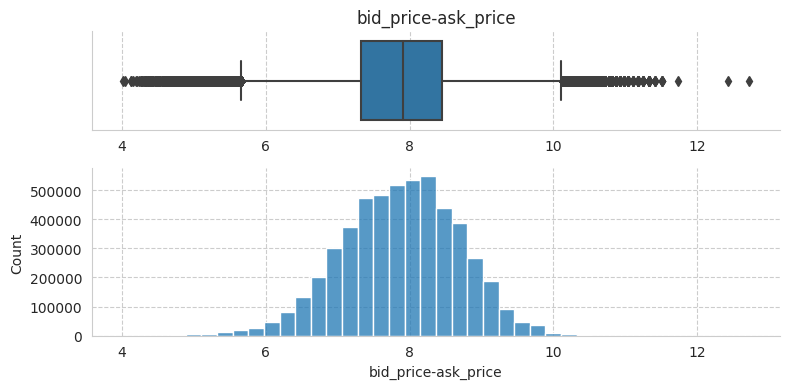

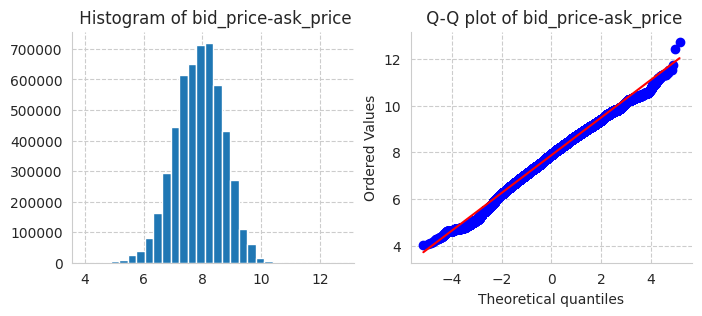

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_tf,"bid_price-ask_price")
diagnostic_plots(train_tf, "bid_price-ask_price");

In [ ]:
train_tf=train[["imbalance_near_price_far_price","imbalance_bid_price_reference_price"]].copy()
#transformer = FunctionTransformer( np.reciprocal)

#transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
#transformer.fit(X_tf)
#train_tf = transformer.transform(train_tf)

train_tf = pd.DataFrame(train_tf,columns=["imbalance_near_price_far_price","imbalance_bid_price_reference_price"])
train_tf["target"] = train["target"]
train_tf.corr()

imbalance_near_price_far_price  \
imbalance_near_price_far_price                             1.000000   
imbalance_bid_price_reference_price                        0.109358   
target                                                    -0.005904   

                                     imbalance_bid_price_reference_price  \
imbalance_near_price_far_price                                  0.109358   
imbalance_bid_price_reference_price                             1.000000   
target                                                         -0.025834   

                                       target  
imbalance_near_price_far_price      -0.005904  
imbalance_bid_price_reference_price -0.025834  
target                               1.000000

#### **4.9 TRANSFORMATION SPEED**

In [ ]:
feature_list = ["ask_size","bid_size","imbalance_size","volume","matched_size"]
["dispersion","bidask_priceXsize","wap-bid_price","imbalance_wap_ask_price","imbalance_bid_price_ask_price"]

['dispersion',
 'bidask_priceXsize',
 'wap-bid_price',
 'imbalance_wap_ask_price',
 'imbalance_bid_price_ask_price']

* Numpy np.log

In [ ]:
%%time
train_tf = train[feature_list].copy()
train_tf = np.log(train + 1)

CPU times: user 4.37 s, sys: 1.34 s, total: 5.71 s
Wall time: 5.68 s


* SK-Learn FunctionTransformer

In [ ]:
%%time
train_tf = train[feature_list].copy()
transformer = FunctionTransformer(lambda x: np.log(x + 1))
train_tf[feature_list] = transformer.transform(train_tf[feature_list])

CPU times: user 503 ms, sys: 204 ms, total: 708 ms
Wall time: 702 ms


In [ ]:
del transformer
gc.collect()

31590

In [ ]:
train_tf

ask_size   bid_size  imbalance_size     volume  matched_size
0         9.047119  11.012916       14.972582  11.143969     16.409292
1         9.933342   8.081487       12.023380  10.079084     14.311557
2         9.851984  10.544209       12.621095  10.949964     14.414000
3        13.079526   7.751862       16.293534  13.084367     16.727304
4         6.075576   9.710300       13.011546   9.736289     16.698109
...            ...        ...             ...        ...           ...
5237887  12.675649  10.381523       14.707805  12.771729     17.157678
5237888  11.444583  12.231299       12.764292  12.606533     16.033376
5237889  12.100931   9.728638        0.000000  12.190096     16.359113
5237890  13.414875  11.741118       13.816410  13.586758     18.366998
5237891  12.612099  12.429546       14.449060  13.218128     16.996630

[5237892 rows x 5 columns]

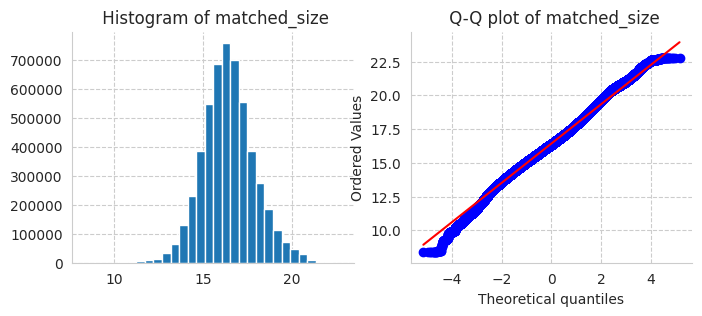

<Figure size 640x480 with 0 Axes>

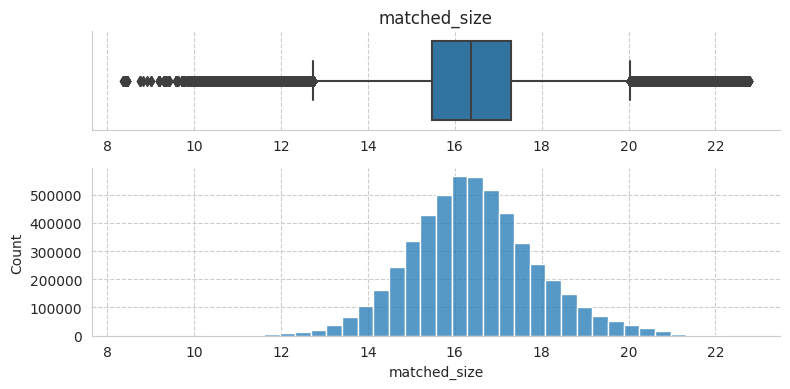

In [ ]:
diagnostic_plots(train_tf, "matched_size")
plot_boxplot_and_hist(train_tf,"matched_size");

## **5.0 FEATURE GENERATION ANALYSIS**

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237892 entries, 0 to 5237891
Data columns (total 84 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   time_id                              int32  
 1   stock_id                             int32  
 2   date_id                              int32  
 3   ask_price                            float32
 4   ask_size                             float32
 5   bid_ask_size_spread                  float32
 6   bid_price                            float32
 7   bid_size                             float32
 8   check_near_far                       float32
 9   dispersion                           float32
 10  eq_wgt_index                         float32
 11  far_price                            float32
 12  imbalance_buy_sell_flag              int32  
 13  imbalance_size_sign                  float32
 14  imbalance_size_sign_delta            float32
 15  matched_size                    

### **5.1 Volume Related Features**

In [24]:
train.columns

Index(['time_id', 'stock_id', 'date_id', 'ask_price', 'ask_size',
       'bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far',
       'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_buy_sell_flag',
       'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
       'near_price', 'reference_price', 'seconds_in_bucket', 'target',
       'vol_bucket', 'wap', 'vol_cluster', 'corr_cluster', 'imbalance1',
       'imbalance2', 'imbalance_ratio', 'volume', 'ask_priceXsize',
       'bidask_priceXsize', 'near_price-far_price',
       'imbalance_near_price_far_price', 'ask_price-reference_price',
       'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price',
       'imbalance_wap_reference_price', 'wap*near_price', 'mov_average_lt',
       'mov_average_st', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
       'wap-bid_price', 'tree_feat_v0', 'tree_feat_v1', 'cum_price_dlag0',
       'cum_price_dlag1', 'cum_price_dlag2', 'cum_price_dlag3',
 

In [ ]:
%%time
volume_feature = ['ask_price', 'ask_size', 'bid_price', 'bid_size','wap','near_price']
train_volume = train[volume_feature]#.apply(lambda x: np.abs(x)).copy()
#train_volume['imbalance_size_sign'].replace({0.0:train_volume['imbalance_size_sign'].median()},inplace=True)
train_volume.describe()

CPU times: user 1.14 s, sys: 2.09 ms, total: 1.14 s
Wall time: 1.14 s


ask_price      ask_size     bid_price      bid_size           wap  \
count  5.237892e+06  5.237892e+06  5.237892e+06  5.237892e+06  5.237892e+06   
mean   1.000264e+00  9.848831e+00  9.997270e-01  9.798406e+00  9.999924e-01   
std    2.510050e-03  1.652599e+00  2.499346e-03  1.670545e+00  2.497513e-03   
min    9.398270e-01  4.637340e-01  9.349150e-01  4.446858e-01  9.380080e-01   
25%    9.990290e-01  8.965079e+00  9.985290e-01  8.906009e+00  9.987810e-01   
50%    1.000207e+00  1.004410e+01  9.997280e-01  9.997469e+00  9.999970e-01   
75%    1.001414e+00  1.096613e+01  1.000905e+00  1.093013e+01  1.001150e+00   
max    1.077836e+00  1.781197e+01  1.077488e+00  1.722626e+01  1.077675e+00   

         near_price  
count  5.237892e+06  
mean   9.998456e-01  
std    8.328128e-03  
min    7.869880e-01  
25%    9.985380e-01  
50%    9.999620e-01  
75%    1.001360e+00  
max    1.309732e+00

#### 5.1.1 Fetature from Aggregation

In [ ]:
#math_func = ["sum", "mean", "std", "max", "min"]
#df_t = train_volume.agg(math_func, axis ="columns")

In [ ]:
#df_t.to_csv("df_aggregating_function.csv", index=False)
df_t = pd.read_csv("df_aggregating_function.csv")

In [ ]:
df_t["target"]=train["target"]

In [ ]:
df_t.describe()

sum          mean           std           max           min  \
count  5.237892e+06  5.237892e+06  5.237892e+06  5.237892e+06  5.237892e+06   
mean   7.004694e+01  1.400939e+01  4.521747e+00  1.984767e+01  9.094605e+00   
std    6.246449e+00  1.249290e+00  3.867061e-01  2.403594e+00  1.720184e+00   
min    2.765284e+01  5.530568e+00  2.697080e+00  1.042992e+01  4.446858e-01   
25%    6.599818e+01  1.319964e+01  4.250791e+00  1.811360e+01  8.079965e+00   
50%    7.015613e+01  1.403123e+01  4.479073e+00  1.977248e+01  9.290114e+00   
75%    7.423117e+01  1.484623e+01  4.751758e+00  2.146554e+01  1.029448e+01   
max    1.001683e+02  2.003366e+01  8.637194e+00  3.159965e+01  1.482247e+01   

             target  
count  5.237892e+06  
mean  -4.756125e-02  
std    9.452860e+00  
min   -3.852898e+02  
25%   -4.559755e+00  
50%   -6.020069e-02  
75%    4.409552e+00  
max    4.460704e+02

In [ ]:
vol_corr = df_t.corr()
vol_corr.target

sum      -0.002663
mean     -0.002663
std      -0.002933
max      -0.001753
min      -0.002154
target    1.000000
Name: target, dtype: float64

#### 5.1.2 Polynomial Expansion:

In [ ]:
volume_feature = ['ask_price', 'ask_size', 'bid_price', 'bid_size','imbalance_bid_price_ask_price']
train_volume = train[volume_feature]#.apply(lambda x: np.abs(x)).copy()

scaler = StandardScaler()
train_volume_scaled = scaler.fit_transform(train_volume)
train_volume_scaled = pd.DataFrame(data=train_volume_scaled, columns=train_volume.columns)

poly = PolynomialFeatures( degree = 2, interaction_only = False, include_bias = False)
dft = poly.fit_transform(train_volume_scaled)

dft = pd.DataFrame( dft, columns = poly.get_feature_names_out() )
#dft["ask_size^2"] = np.log(dft["ask_size^2"])
#dft["bid_size^2"] = np.log(dft["bid_size^2"])

In [ ]:
dft["target"]=train["target"]
dft.shape

(5237892, 21)

In [ ]:
vol_corr = dft.corr()
vol_corr.target

ask_price                                 -0.021671
ask_size                                   0.064138
bid_price                                 -0.022322
bid_size                                  -0.066007
imbalance_bid_price_ask_price             -0.003405
ask_price^2                                0.010723
ask_price ask_size                         0.001307
ask_price bid_price                        0.013261
ask_price bid_size                        -0.012251
ask_price imbalance_bid_price_ask_price    0.017112
ask_size^2                                -0.050552
ask_size bid_price                        -0.009840
ask_size bid_size                          0.000765
ask_size imbalance_bid_price_ask_price    -0.051829
bid_price^2                                0.015288
bid_price bid_size                        -0.000008
bid_price imbalance_bid_price_ask_price    0.017344
bid_size^2                                 0.050439
bid_size imbalance_bid_price_ask_price     0.055033
imbalance_bi

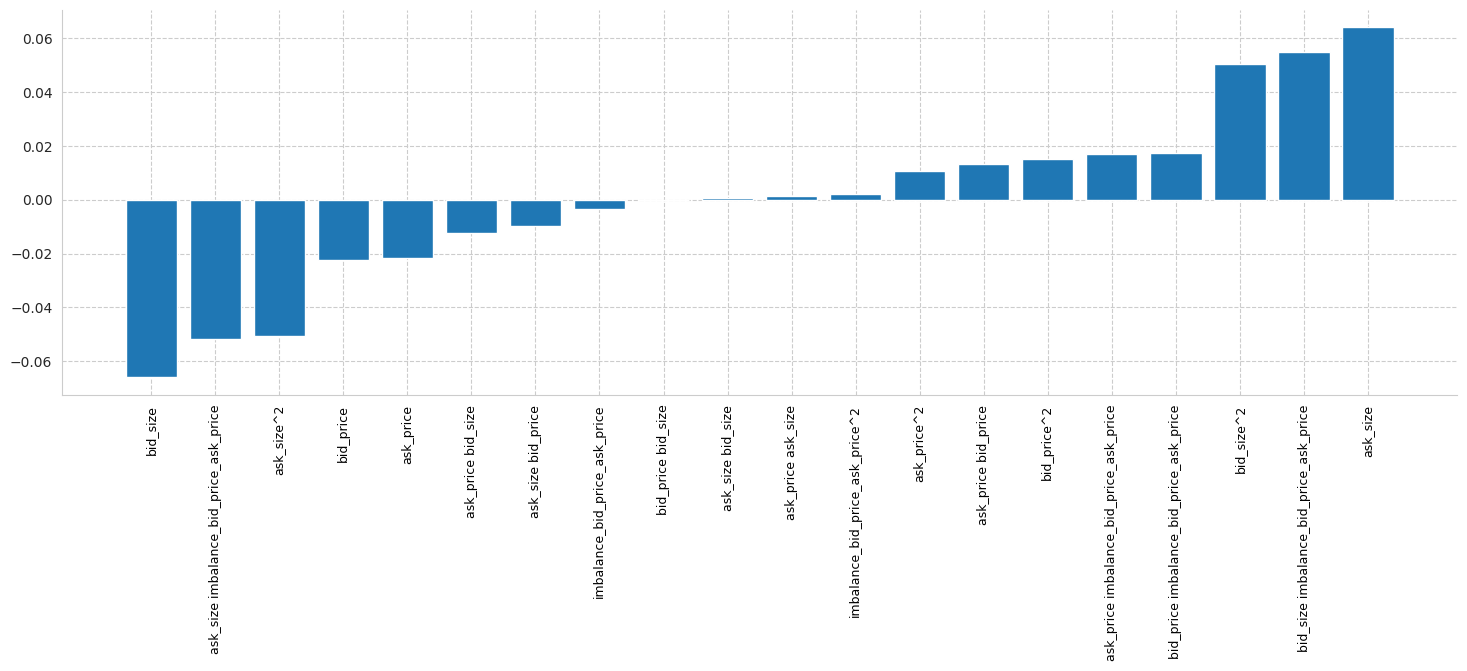

In [ ]:
plt.figure(figsize=(18,5))
correlation = vol_corr["target"]
plt.bar(correlation.sort_values()[:-1].index, height=correlation.sort_values()[:-1].values)
plt.tick_params(axis="x", labelsize=9, labelrotation=90, labelcolor="black")

In [ ]:
# save the scaler

volume_feature = ['ask_size','bid_size']
train_volume = train[volume_feature].copy()

scaler = StandardScaler()
train_volume_scaled = scaler.fit_transform(train_volume)
train_volume_scaled = pd.DataFrame(data=train_volume_scaled, columns=train_volume.columns)

train_volume_scaled = train_volume_scaled**2
train_volume_scaled = np.log(train_volume_scaled)

current_directory = os.getcwd()

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

with open('bid_ask_scaler.pickle', 'wb') as handle:
    pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)
os.chdir(current_directory)


In [ ]:
train_volume_scaled

ask_size  bid_size
0        -1.446713 -0.637620
1        -5.946428  0.054765
2       -12.523003 -1.612890
3         1.340696  0.406007
4         1.651177 -5.884676
...            ...       ...
5237887   1.073606 -2.105043
5237888  -0.070008  0.751861
5237889   0.619027 -6.351398
5237890   1.538215  0.301869
5237891   1.028130  0.908534

[5237892 rows x 2 columns]

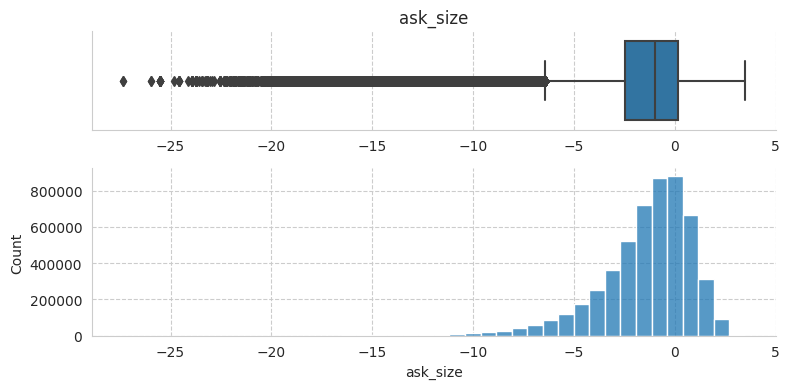

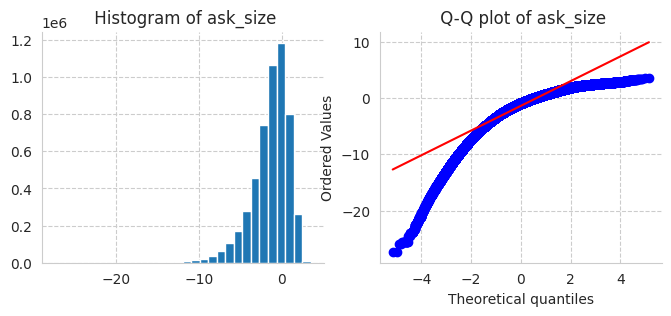

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_boxplot_and_hist(train_volume_scaled,"ask_size")
diagnostic_plots(train_volume_scaled,"ask_size");

### 5.2 Tree Based Features:

In [25]:
corr = train.corr()

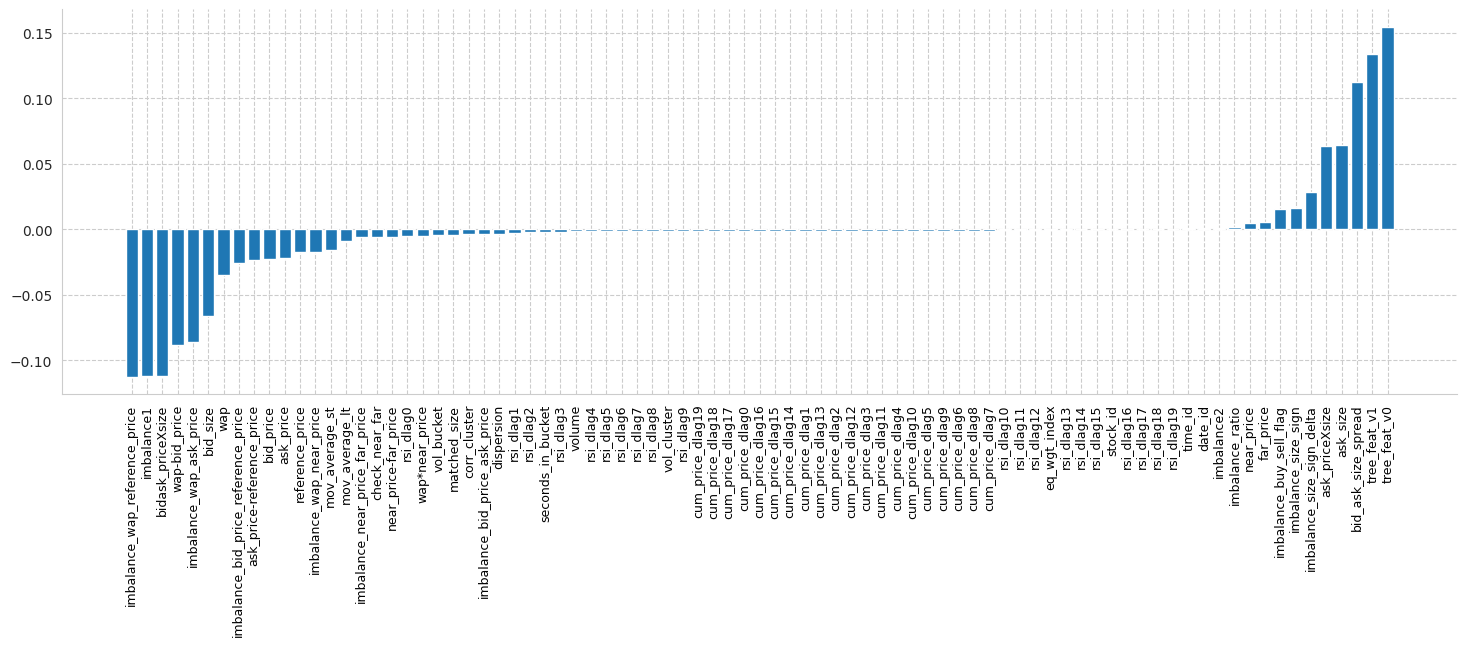

In [26]:
plt.figure(figsize=(18,5))
correlation = corr.target
plt.bar(correlation.sort_values()[:-1].index, height=correlation.sort_values()[:-1].values)
plt.tick_params(axis="x", labelsize=9, labelrotation=90, labelcolor="black")

#### 5.2.1 Tree Generated Feature N.1

In [ ]:
tree_features = ['imbalance_wap_reference_price', 'imbalance_size_sign_delta', 'rsi_dlag0','bid_ask_size_spread']

tresh = int(480*0.7)

X_train, X_test = train[train.date_id<=tresh].loc[:,tree_features], train[train.date_id>tresh].loc[:,tree_features]
y_train, y_test = train[train.date_id<=tresh].loc[:,"target"], train[train.date_id>tresh].loc[:,"target"]

X_train

imbalance_wap_reference_price  imbalance_size_sign_delta   rsi_dlag0  \
0                             0.000094                   0.000000    0.000000   
1                             0.000052                   0.000000    0.000000   
2                             0.000220                   0.000000  100.000000   
3                            -0.000085                   0.000000    0.000000   
4                             0.000234                   0.000000  100.000000   
...                                ...                        ...         ...   
3653943                       0.000019                   0.000000   95.596207   
3653944                      -0.000011                   0.000578   99.324402   
3653945                       0.000051                   0.000000    0.139882   
3653946                      -0.000051                   0.000000   99.755722   
3653947                       0.000024                   0.000000   36.261154   

         bid_ask_size_spread  
0                  -1.965797  
1                   1.851855  
2                  -0.692226  
3                   5.327663  
4                  -3.634724  
...                      ...  
3653943             0.567110  
3653944             0.277135  
3653945             0.180749  
3653946            -0.551953  
3653947             1.802117  

[3653948 rows x 4 columns]

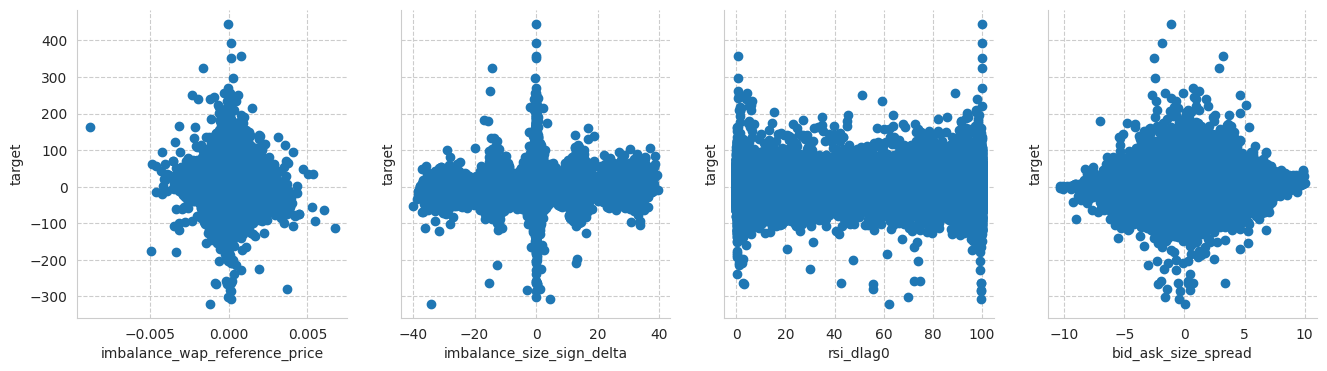

In [ ]:
fig, axs = plt.subplots(1, 4, figsize =(16, 4), sharey = True)

for num, sec in enumerate(tree_features):
  axs[num].scatter( X_train[sec], y_train)
  axs[num].set_ylabel("target")
  axs[num].set_xlabel(sec);

In [ ]:
X_train.corr()

imbalance_wap_reference_price  \
imbalance_wap_reference_price                       1.000000   
imbalance_size_sign_delta                           0.097194   
rsi_dlag0                                          -0.027232   
bid_ask_size_spread                                -0.378922   

                               imbalance_size_sign_delta  rsi_dlag0  \
imbalance_wap_reference_price                   0.097194  -0.027232   
imbalance_size_sign_delta                       1.000000  -0.017264   
rsi_dlag0                                      -0.017264   1.000000   
bid_ask_size_spread                            -0.007474  -0.019513   

                               bid_ask_size_spread  
imbalance_wap_reference_price            -0.378922  
imbalance_size_sign_delta                -0.007474  
rsi_dlag0                                -0.019513  
bid_ask_size_spread                       1.000000

In [ ]:
X_train = train.loc[:,tree_features]
y_train = train.loc[:,"target"]

param_grid = {"max_depth": [11,12],
              "min_samples_split":[5000,7500],
              "min_samples_leaf":[1000,5000]
              }

tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)
tree_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-5.769 total time=  33.2s
[CV 2/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-7.114 total time=  33.1s
[CV 3/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-6.389 total time=  33.7s
[CV 4/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-6.376 total time=  33.3s
[CV 5/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-6.007 total time=  33.5s
[CV 1/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-5.769 total time=  33.1s
[CV 2/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-7.114 total time=  33.2s
[CV 3/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-6.388 total time=  33.5s
[CV 4/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-6.

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [11, 12],
                         'min_samples_leaf': [1000, 5000],
                         'min_samples_split': [5000, 7500]},
             scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
tree_model.best_score_,tree_model.best_params_

(-6.330896026493781,
 {'max_depth': 11, 'min_samples_leaf': 1000, 'min_samples_split': 5000})

In [ ]:
tree_model.best_score_,tree_model.best_params_

(-6.328882453873467,
 {'max_depth': 12, 'min_samples_leaf': 5000, 'min_samples_split': 5000})

In [ ]:
import joblib

#estimator = tree_model.best_estimator_

current_directory = os.getcwd()

#os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
#joblib.dump(estimator, "tree_feature_model_v0.joblib")
#os.chdir(current_directory)

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
estimator = joblib.load("tree_feature_model_v0.joblib")
os.chdir(current_directory)

In [ ]:
train["tree_feat_v0"] = estimator.predict(train[tree_features])

X_test["tree_feat_v0"] = estimator.predict(X_test[tree_features])
X_train["tree_feat_v0"] = estimator.predict(X_train[tree_features])

In [ ]:
for var in tree_features + ["tree_feat_v0"]:
  corr = np.corrcoef(train[var], train.target)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")


Correlation between imbalance_wap_reference_price and the target: -0.112
Correlation between imbalance_size_sign_delta and the target: 0.028
Correlation between rsi_dlag0 and the target: -0.005
Correlation between bid_ask_size_spread and the target: 0.112
Correlation between tree_feat_v0 and the target: 0.155


In [ ]:
for var in tree_features + ["tree_feat_v0"]:
  corr = np.corrcoef(X_train[var], y_train)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between imbalance_wap_reference_price and the target: -0.112
Correlation between imbalance_size_sign_delta and the target: 0.028
Correlation between rsi_dlag0 and the target: -0.005
Correlation between bid_ask_size_spread and the target: 0.112
Correlation between tree_feat_v0 and the target: 0.155


In [ ]:
for var in tree_features + ["tree_feat_v0"]:
  corr = np.corrcoef(X_test[var], y_test)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between imbalance_wap_reference_price and the target: -0.078
Correlation between imbalance_size_sign_delta and the target: 0.028
Correlation between rsi_dlag0 and the target: -0.005
Correlation between bid_ask_size_spread and the target: 0.097
Correlation between tree_feat_v0 and the target: 0.132


#### 5.2.2 Tree Generated Feature N.2

In [ ]:
tree_features = ['imbalance_size_sign', 'matched_size', 'ask_size','bid_size','bid_ask_size_spread']

tresh = int(480*0.7)

X_train, X_test = train[train.date_id<=tresh].loc[:,tree_features], train[train.date_id>tresh].loc[:,tree_features]
y_train, y_test = train[train.date_id<=tresh].loc[:,"target"], train[train.date_id>tresh].loc[:,"target"]

X_train

imbalance_size_sign  matched_size   ask_size   bid_size  \
0                  14.972582     16.409292   9.047119  11.012917   
1                 -12.023380     14.311557   9.933342   8.081488   
2                 -12.621095     14.414001   9.851984  10.544209   
3                 -16.293533     16.727304  13.079526   7.751863   
4                 -13.011546     16.698109   6.075576   9.710299   
...                      ...           ...        ...        ...   
3653943             0.000000     17.480125  11.951182  11.384073   
3653944           -13.308052     15.357888  12.073046  11.795911   
3653945            -9.404821     18.095768  12.286233  12.105484   
3653946             0.000000     18.545877  13.254013  13.805965   
3653947           -13.696335     16.590036  12.627103  10.824986   

         bid_ask_size_spread  
0                  -1.965797  
1                   1.851855  
2                  -0.692226  
3                   5.327663  
4                  -3.634724  
...                      ...  
3653943             0.567110  
3653944             0.277135  
3653945             0.180749  
3653946            -0.551953  
3653947             1.802117  

[3653948 rows x 5 columns]

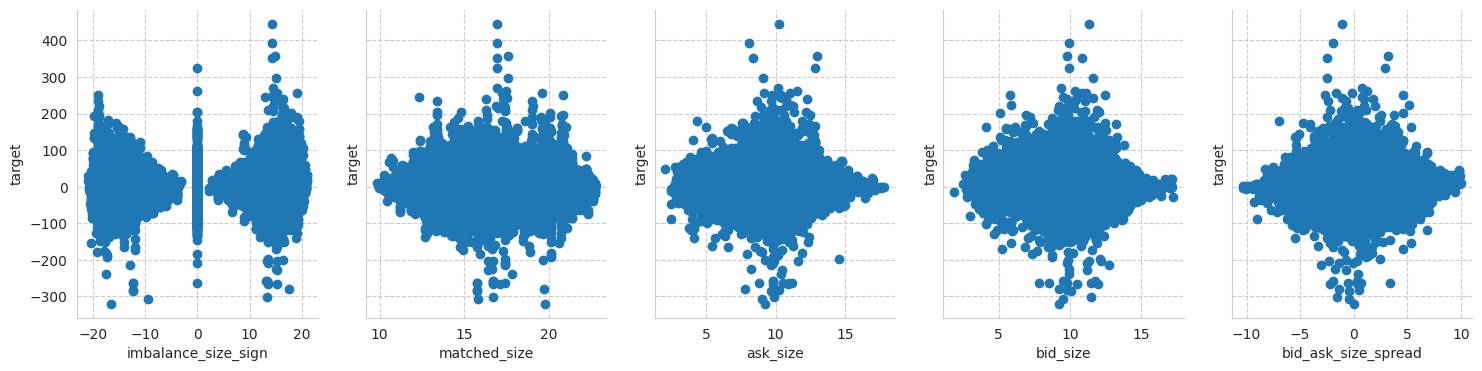

In [ ]:
fig, axs = plt.subplots(1, 5, figsize =(18, 4), sharey = True)

for num, sec in enumerate(tree_features):
  axs[num].scatter( X_train[sec], y_train)
  axs[num].set_ylabel("target")
  axs[num].set_xlabel(sec);

In [ ]:
X_train.corr()

imbalance_size_sign  matched_size  ask_size  bid_size  \
imbalance_size_sign             1.000000     -0.035633 -0.011623  0.041540   
matched_size                   -0.035633      1.000000  0.133488  0.121710   
ask_size                       -0.011623      0.133488  1.000000  0.307915   
bid_size                        0.041540      0.121710  0.307915  1.000000   
bid_ask_size_spread            -0.045310      0.008956  0.582834 -0.593647   

                     bid_ask_size_spread  
imbalance_size_sign            -0.045310  
matched_size                    0.008956  
ask_size                        0.582834  
bid_size                       -0.593647  
bid_ask_size_spread             1.000000

In [ ]:
X_train = train.loc[:,tree_features]
y_train = train.loc[:,"target"]

param_grid = {"max_depth": [10,11,12,None],
              "min_samples_split":[2,5000],
              "min_samples_leaf":[1,1000]
              }

tree_model_v1 = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)
tree_model_v1.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=-5.814 total time=  44.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=-7.159 total time=  42.7s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=-6.415 total time=  44.3s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=-6.402 total time=  43.0s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=-6.034 total time=  43.8s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5000;, score=-5.806 total time=  43.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5000;, score=-7.152 total time=  45.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5000;, score=-6.411 total time=  43.3s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5000;, score=-6.397 total time=  44.2s
[CV 5/5] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [10, 11, 12, None],
                         'min_samples_leaf': [1, 1000],
                         'min_samples_split': [2, 5000]},
             scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
tree_model_v1.best_score_,tree_model_v1.best_params_

(-6.35650108912332,
 {'max_depth': 10, 'min_samples_leaf': 1000, 'min_samples_split': 5000})

In [ ]:
import joblib

estimator_v1 = tree_model_v1.best_estimator_

current_directory = os.getcwd()

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
joblib.dump(estimator_v1, "tree_feature_model_v1.joblib")
os.chdir(current_directory)

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
estimator_v1 = joblib.load("tree_feature_model_v1.joblib")
os.chdir(current_directory)

In [ ]:
train["tree_feat_v1"] = estimator_v1.predict(train[tree_features])

X_test["tree_feat_v1"] = estimator_v1.predict(X_test[tree_features])
X_train["tree_feat_v1"] = estimator_v1.predict(X_train[tree_features])

In [ ]:
for var in tree_features + ["tree_feat_v1"]:
  corr = np.corrcoef(train[var], train.target)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")


Correlation between imbalance_size_sign and the target: 0.016
Correlation between matched_size and the target: -0.004
Correlation between ask_size and the target: 0.064
Correlation between bid_size and the target: -0.066
Correlation between bid_ask_size_spread and the target: 0.112
Correlation between tree_feat_v1 and the target: 0.134


In [ ]:
for var in tree_features + ["tree_feat_v1"]:
  corr = np.corrcoef(X_train[var], y_train)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between imbalance_size_sign and the target: 0.016
Correlation between matched_size and the target: -0.004
Correlation between ask_size and the target: 0.064
Correlation between bid_size and the target: -0.066
Correlation between bid_ask_size_spread and the target: 0.112
Correlation between tree_feat_v1 and the target: 0.134


In [ ]:
for var in tree_features + ["tree_feat_v1"]:
  corr = np.corrcoef(X_test[var], y_test)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between imbalance_size_sign and the target: 0.012
Correlation between matched_size and the target: 0.004
Correlation between ask_size and the target: 0.055
Correlation between bid_size and the target: -0.054
Correlation between bid_ask_size_spread and the target: 0.097
Correlation between tree_feat_v1 and the target: 0.122


#### 5.2.3 Tree Generated Feature N.3

In [46]:
tree_features = ['mov_average_st', 'mov_average_lt', 'bid_ask_size_spread','imbalance_wap_reference_price','rsi_dlag0']

tresh = int(480*0.7)

X_train, X_test = train[train.date_id<=tresh].loc[:,tree_features], train[train.date_id>tresh].loc[:,tree_features]
y_train, y_test = train[train.date_id<=tresh].loc[:,"target"], train[train.date_id>tresh].loc[:,"target"]

X_train

mov_average_st  mov_average_lt  bid_ask_size_spread  \
0              0.000000        0.000000            -1.965797   
1              0.000000        0.000000             1.851855   
2              0.000000        0.000000            -0.692226   
3              0.000000        0.000000             5.327663   
4              0.000000        0.000000            -3.634724   
...                 ...             ...                  ...   
3653943        0.009342        0.016549             0.567110   
3653944        0.018296        0.050546             0.277135   
3653945       -0.074570       -0.177543             0.180749   
3653946        0.034546        0.080741            -0.551953   
3653947        0.001249       -0.008156             1.802117   

         imbalance_wap_reference_price   rsi_dlag0  
0                             0.000094    0.000000  
1                             0.000052    0.000000  
2                             0.000220  100.000000  
3                            -0.000085    0.000000  
4                             0.000234  100.000000  
...                                ...         ...  
3653943                       0.000019   95.596207  
3653944                      -0.000011   99.324402  
3653945                       0.000051    0.139882  
3653946                      -0.000051   99.755722  
3653947                       0.000024   36.261154  

[3653948 rows x 5 columns]

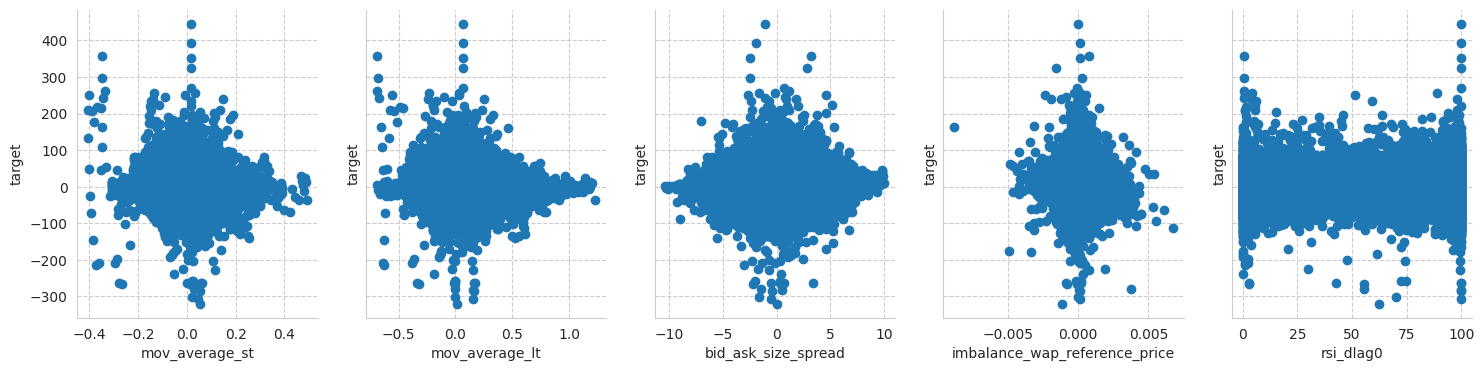

In [47]:
fig, axs = plt.subplots(1, 5, figsize =(18, 4), sharey = True)

for num, sec in enumerate(tree_features):
  axs[num].scatter( X_train[sec], y_train)
  axs[num].set_ylabel("target")
  axs[num].set_xlabel(sec);

In [49]:
X_train["lt_st"] = X_train["mov_average_lt"].subtract(X_train["mov_average_st"])
X_train.corr()

mov_average_st  mov_average_lt  \
mov_average_st                       1.000000        0.857349   
mov_average_lt                       0.857349        1.000000   
bid_ask_size_spread                 -0.018812       -0.006383   
imbalance_wap_reference_price       -0.042746       -0.028266   
rsi_dlag0                            0.757861        0.781293   
lt_st                                0.674350        0.958240   

                               bid_ask_size_spread  \
mov_average_st                           -0.018812   
mov_average_lt                           -0.006383   
bid_ask_size_spread                       1.000000   
imbalance_wap_reference_price            -0.378922   
rsi_dlag0                                -0.019513   
lt_st                                     0.001295   

                               imbalance_wap_reference_price  rsi_dlag0  \
mov_average_st                                     -0.042746   0.757861   
mov_average_lt                                     -0.028266   0.781293   
bid_ask_size_spread                                -0.378922  -0.019513   
imbalance_wap_reference_price                       1.000000  -0.027232   
rsi_dlag0                                          -0.027232   1.000000   
lt_st                                              -0.016802   0.699766   

                                  lt_st  
mov_average_st                 0.674350  
mov_average_lt                 0.958240  
bid_ask_size_spread            0.001295  
imbalance_wap_reference_price -0.016802  
rsi_dlag0                      0.699766  
lt_st                          1.000000

In [64]:
X_train = train.loc[:,tree_features]
y_train = train.loc[:,"target"]


param_grid = {"max_depth": [11,12],
              "min_samples_split":[5000,7500],
              "min_samples_leaf":[1000,7500]
              }

tree_model_v2 = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)
tree_model_v2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-5.776 total time=  46.7s
[CV 2/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-7.123 total time=  45.9s
[CV 3/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-6.396 total time=  46.3s
[CV 4/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-6.384 total time=  46.3s
[CV 5/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=5000;, score=-6.014 total time=  46.3s
[CV 1/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-5.776 total time=  46.4s
[CV 2/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-7.122 total time=  45.5s
[CV 3/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-6.396 total time=  45.9s
[CV 4/5] END max_depth=11, min_samples_leaf=1000, min_samples_split=7500;, score=-6.

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [11, 12],
                         'min_samples_leaf': [1000, 7500],
                         'min_samples_split': [5000, 7500]},
             scoring='neg_mean_absolute_error', verbose=3)

In [65]:
tree_model_v2.best_score_,tree_model_v2.best_params_

(-6.336761129631492,
 {'max_depth': 12, 'min_samples_leaf': 7500, 'min_samples_split': 5000})

In [66]:
import joblib

estimator_v2 = tree_model_v2.best_estimator_

current_directory = os.getcwd()

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
joblib.dump(estimator_v2, "tree_feature_model_v2.joblib")
os.chdir(current_directory)

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
estimator_v2 = joblib.load("tree_feature_model_v2.joblib")
os.chdir(current_directory)

In [67]:
train["tree_feat_v2"] = estimator_v2.predict(train[tree_features])

X_test["tree_feat_v2"] = estimator_v2.predict(X_test[tree_features])
X_train["tree_feat_v2"] = estimator_v2.predict(X_train[tree_features])

In [68]:
for var in tree_features + ["tree_feat_v2"]:
  corr = np.corrcoef(train[var], train.target)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between mov_average_st and the target: -0.016
Correlation between mov_average_lt and the target: -0.009
Correlation between bid_ask_size_spread and the target: 0.112
Correlation between imbalance_wap_reference_price and the target: -0.112
Correlation between rsi_dlag0 and the target: -0.005
Correlation between tree_feat_v2 and the target: 0.146


In [69]:
for var in tree_features + ["tree_feat_v2"]:
  corr = np.corrcoef(X_train[var], y_train)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between mov_average_st and the target: -0.016
Correlation between mov_average_lt and the target: -0.009
Correlation between bid_ask_size_spread and the target: 0.112
Correlation between imbalance_wap_reference_price and the target: -0.112
Correlation between rsi_dlag0 and the target: -0.005
Correlation between tree_feat_v2 and the target: 0.146


In [70]:
for var in tree_features + ["tree_feat_v2"]:
  corr = np.corrcoef(X_test[var], y_test)[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between mov_average_st and the target: -0.016
Correlation between mov_average_lt and the target: -0.01
Correlation between bid_ask_size_spread and the target: 0.097
Correlation between imbalance_wap_reference_price and the target: -0.078
Correlation between rsi_dlag0 and the target: -0.005
Correlation between tree_feat_v2 and the target: 0.122


In [ ]:
correlation.sort_values()[:-1].index

Index(['imbalance_wap_reference_price', 'imbalance1', 'bidask_priceXsize',
       'wap-bid_price', 'imbalance_wap_ask_price', 'bid_size', 'wap',
       'imbalance_bid_price_reference_price', 'ask_price-reference_price',
       'bid_price', 'ask_price', 'reference_price', 'imbalance_wap_near_price',
       'mov_average_st', 'mov_average_lt', 'imbalance_near_price_far_price',
       'check_near_far', 'near_price-far_price', 'rsi_dlag0', 'wap*near_price',
       'vol_bucket', 'matched_size', 'corr_cluster',
       'imbalance_bid_price_ask_price', 'dispersion', 'rsi_dlag1', 'rsi_dlag2',
       'seconds_in_bucket', 'rsi_dlag3', 'volume', 'rsi_dlag4', 'rsi_dlag5',
       'rsi_dlag6', 'rsi_dlag7', 'rsi_dlag8', 'vol_cluster', 'rsi_dlag9',
       'cum_price_dlag19', 'cum_price_dlag18', 'cum_price_dlag17',
       'cum_price_dlag0', 'cum_price_dlag16', 'cum_price_dlag15',
       'cum_price_dlag14', 'cum_price_dlag1', 'cum_price_dlag13',
       'cum_price_dlag2', 'cum_price_dlag12', 'cum_price_dla